# Emerging Technology Assessment 2020
<hr>
This is my solution to the assessment that I must complete for the 2020 Emerging Technology module. My name is Sagheer Ahmad (G00357770@gmit.ie).

The aim of this project is to: 

```
    1. Jupyter notebook that trains a model using the data set. In the notebook you
       should explain your model and give an analysis of its accuracy.
    2. Python script that runs a web service based on the model, as above.
    3. Dockerfile to build and run the web service in a container.
    4. Standard items in a git repository such as a README.
```

This jupyter notebook will be used for the first part of the project. I will be creating a model based on the data that we have recieved and creating a model using keras and tensorflow. 

***
Before we start the coding aspect of this project, we need to get a better understanding of wind turbines and how they produce power depending on the speed of the wind. 

According to wikipedia, Wind turbine design is the process of defining the form and specifications of a wind turbine to extract energy from the wind. A wind turbine installation consists of the necessary systems needed to capture the wind's energy, point the turbine into the wind, convert mechanical rotation into electrical power, and other systems to start, stop, and control the turbine.[1]

The wind turbines are controlled for efficiency and making sure the wind turbines can handle the speed and the torque. The blades on the wind turbines increase as the speed increases which can cause the turbine to be sensitive to high speeds. Wind turbines have a cut in speed of 3 to 4 m/s and a cut off rate of 25 m/s this can be seen in the dataset that we will be using which shows the speed and power of the wind turbines. The dataset has a a very low value at the start and a value of 0 where the speed is 25 or above. Sometimes the value can be 0 even though the winds are high and this can be due to the wind turbines not efficiently storing the electricity or the wind turbines malfunctioning.

![](https://upload.wikimedia.org/wikipedia/commons/6/67/Powercurve.png)

[1] Wind turbine design
[https://en.wikipedia.org/wiki/Wind_turbine_design#:~:text=Wind%20turbines%20have%20ways%20of,power%20has%20to%20be%20limited.]

*** 
These are the neccessary imports that will be used to create a model and plot the results onto a graph.

In [1]:
# import numpy class
import numpy as np
# import panda class for handling data
import pandas as pd
# Plotting
import matplotlib.pyplot as plt
# keras imports to split the dataset for training and testing 
import tensorflow as tf
# Neural networks.
import tensorflow.keras as kr
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.python.keras.models import Model

<hr>
The program is currently Reading in the data using the panda class. It is taking in the link that was provided on Moodle and saving it into the powerProduction variable. The data being read in is from a csv file. A csv file is a basic text file. Csv is used for storing tabular data in text form, meaning the commas are used to seperate each column and newlines are used to seperate rows. Typically, the first row in a CSV file contains the names of the columns for the data. [1]

The data is then printed out out using the head function. The head function is part of the panda library and is use dto return the n number of rows from the data, for example in this instance it is returning the first 5 lines of data.

The describe function is used to output a summary of statistics relating to the dataframe columns. It prints values such as the Mean, STD, and the IQR values.[2]

[1] Reading data using the panda library  
https://www.shanelynn.ie/python-pandas-read_csv-load-data-from-csv-files/  

[2] The describe function  
https://www.tutorialspoint.com/python_pandas/python_pandas_descriptive_statistics.htm#:~:text=The%20describe()%20function%20computes,pertaining%20to%20the%20DataFrame%20columns.&text=This%20function%20gives%20the%20mean,given%20summary%20about%20numeric%20columns.  

In [2]:
#Read in the data from the link provided on moodle
powerProductionData = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")
#print out the results
powerProductionData.head(500)

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [3]:
#Generate descriptive statistics.
powerProductionData.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


In [4]:
#https://keras.io/api/layers/core_layers/input/
#https://keras.io/guides/sequential_model/
#https://stackabuse.com/deep-learning-in-keras-building-a-deep-learning-model/

***
Here I am outputting the dataset to see what the values are like before i create the model and make any predictions. This is so that I have something to reference back to when i need to see if the predictions being made are accurate or not. I have titled the axis to make it easier to read the graph.

Text(0.5, 1.0, 'Model of Wind Turbine Speed and Power')

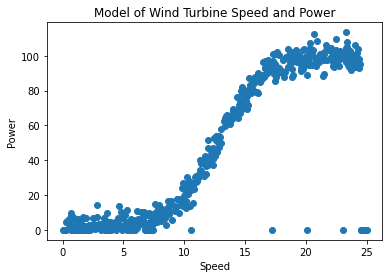

In [5]:
# Plot the values.
plt.plot(powerProductionData['speed'], powerProductionData['power'], 'o');

#label the x axis 
plt.xlabel('Speed')
#label the y axis 
plt.ylabel('Power')
# Set the title
plt.title('Model of Wind Turbine Speed and Power')

***
We are now creating a model that will be trained with the dataset so that it can make predictions. I am intially changing the dataset into arrays so that it is easier to read when the model.fit() is being performed. By using a colon we can take everything in the first dimension while using the comma we can take the first value within that point.

The second part of this code is creating a keras input which is used to instantiate a Keras tensor.[1]
```
A Keras tensor is a TensorFlow symbolic tensor object, which we augment with certain attributes that allow us to build a Keras model just by knowing the inputs and outputs of the model.
```

Next I create layers and give them a activation layer. I used sigmoid mainly as our dataset resembles a sigmoid function.
![](https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg)

The model.compile configures the model for training. It takes in a few arguements that allow it to run. The first arguement is an optimizer instance, the next arguement is the loss arguemnet which we can use to set the type of the loss and the final I am is using is the metrics arguement. This allows us to set metrics=['accuracy'] this basically allows to create a history of the model and allow us to graph the loss and accuracy of the model.[2]

[1] Input Object
[https://keras.io/api/layers/core_layers/input/]

[2] Model training APIs
[https://keras.io/api/models/model_training_apis/]

***

# First attempt at the model
***
There was a couple ways to do this model. I tested a couple of these ways and found this was the most efficient and gave the best predictions. 

This was my initial start at creating a model using keras. This was a good start and gave me a better understanding of the loss and accuracy of the data. I wanted to get the loss to be lower and the predictions to be way more accurate.

In [6]:
# Train a different model.
model = kr.models.Sequential()
model.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')

# Fit the data.
model.fit(powerProductionData['speed'], powerProductionData['power'], epochs=500, batch_size=10)

Epoch 1/500
50/50 [==============================] - 0s 940us/step - loss: 3831.5312
Epoch 2/500
50/50 [==============================] - 0s 999us/step - loss: 3633.0200
Epoch 3/500
50/50 [==============================] - 0s 921us/step - loss: 3379.9775
Epoch 4/500
50/50 [==============================] - 0s 982us/step - loss: 3094.9702
Epoch 5/500
50/50 [==============================] - 0s 1000us/step - loss: 2855.6155
Epoch 6/500
50/50 [==============================] - 0s 923us/step - loss: 2681.4304
Epoch 7/500
50/50 [==============================] - 0s 1ms/step - loss: 2539.5466
Epoch 8/500
50/50 [==============================] - 0s 1ms/step - loss: 2421.0571
Epoch 9/500
50/50 [==============================] - 0s 1ms/step - loss: 2315.4551
Epoch 10/500
50/50 [==============================] - 0s 1ms/step - loss: 2217.4255
Epoch 11/500
50/50 [==============================] - 0s 1ms/step - loss: 2127.9387
Epoch 12/500
50/50 [==============================] - 0s 1ms/step - loss

50/50 [==============================] - 0s 2ms/step - loss: 335.8565
Epoch 99/500
50/50 [==============================] - 0s 3ms/step - loss: 335.2192
Epoch 100/500
50/50 [==============================] - 0s 2ms/step - loss: 335.4135
Epoch 101/500
50/50 [==============================] - 0s 3ms/step - loss: 334.1150
Epoch 102/500
50/50 [==============================] - 0s 2ms/step - loss: 332.9867
Epoch 103/500
50/50 [==============================] - 0s 2ms/step - loss: 332.4563
Epoch 104/500
50/50 [==============================] - 0s 2ms/step - loss: 331.5425
Epoch 105/500
50/50 [==============================] - 0s 3ms/step - loss: 331.9843
Epoch 106/500
50/50 [==============================] - 0s 2ms/step - loss: 330.0139
Epoch 107/500
50/50 [==============================] - 0s 2ms/step - loss: 329.7827
Epoch 108/500
50/50 [==============================] - 0s 2ms/step - loss: 329.1501
Epoch 109/500
50/50 [==============================] - 0s 2ms/step - loss: 328.6509
Epoch 1

50/50 [==============================] - 0s 3ms/step - loss: 290.0112
Epoch 196/500
50/50 [==============================] - 0s 3ms/step - loss: 289.5760
Epoch 197/500
50/50 [==============================] - 0s 3ms/step - loss: 289.0690
Epoch 198/500
50/50 [==============================] - 0s 3ms/step - loss: 289.1865
Epoch 199/500
50/50 [==============================] - 0s 3ms/step - loss: 288.3456
Epoch 200/500
50/50 [==============================] - 0s 3ms/step - loss: 287.8795
Epoch 201/500
50/50 [==============================] - 0s 3ms/step - loss: 287.4556
Epoch 202/500
50/50 [==============================] - 0s 3ms/step - loss: 286.9933
Epoch 203/500
50/50 [==============================] - 0s 2ms/step - loss: 286.6084
Epoch 204/500
50/50 [==============================] - 0s 2ms/step - loss: 286.1765
Epoch 205/500
50/50 [==============================] - 0s 2ms/step - loss: 286.0951
Epoch 206/500
50/50 [==============================] - 0s 3ms/step - loss: 285.5621
Epoch 

50/50 [==============================] - 0s 2ms/step - loss: 264.1077
Epoch 293/500
50/50 [==============================] - 0s 2ms/step - loss: 263.9104
Epoch 294/500
50/50 [==============================] - 0s 2ms/step - loss: 263.7554
Epoch 295/500
50/50 [==============================] - 0s 3ms/step - loss: 263.6426
Epoch 296/500
50/50 [==============================] - 0s 3ms/step - loss: 263.4255
Epoch 297/500
50/50 [==============================] - 0s 3ms/step - loss: 263.3032
Epoch 298/500
50/50 [==============================] - 0s 3ms/step - loss: 263.0985
Epoch 299/500
50/50 [==============================] - 0s 2ms/step - loss: 263.1201
Epoch 300/500
50/50 [==============================] - 0s 2ms/step - loss: 263.1914
Epoch 301/500
50/50 [==============================] - 0s 2ms/step - loss: 262.8699
Epoch 302/500
50/50 [==============================] - 0s 2ms/step - loss: 262.8478
Epoch 303/500
50/50 [==============================] - 0s 2ms/step - loss: 262.8792
Epoch 

50/50 [==============================] - 0s 2ms/step - loss: 256.5364
Epoch 390/500
50/50 [==============================] - 0s 2ms/step - loss: 256.4950
Epoch 391/500
50/50 [==============================] - 0s 2ms/step - loss: 256.6074
Epoch 392/500
50/50 [==============================] - 0s 2ms/step - loss: 256.2852
Epoch 393/500
50/50 [==============================] - 0s 2ms/step - loss: 256.3648
Epoch 394/500
50/50 [==============================] - 0s 3ms/step - loss: 256.2119
Epoch 395/500
50/50 [==============================] - 0s 3ms/step - loss: 256.1844
Epoch 396/500
50/50 [==============================] - 0s 3ms/step - loss: 256.4652
Epoch 397/500
50/50 [==============================] - 0s 3ms/step - loss: 256.3238
Epoch 398/500
50/50 [==============================] - 0s 3ms/step - loss: 256.1839
Epoch 399/500
50/50 [==============================] - 0s 3ms/step - loss: 256.3009
Epoch 400/500
50/50 [==============================] - 0s 2ms/step - loss: 256.0591
Epoch 

50/50 [==============================] - 0s 2ms/step - loss: 254.0887
Epoch 487/500
50/50 [==============================] - 0s 2ms/step - loss: 253.7987
Epoch 488/500
50/50 [==============================] - 0s 3ms/step - loss: 253.7908
Epoch 489/500
50/50 [==============================] - 0s 2ms/step - loss: 253.7483
Epoch 490/500
50/50 [==============================] - 0s 2ms/step - loss: 253.8138
Epoch 491/500
50/50 [==============================] - 0s 2ms/step - loss: 253.7941
Epoch 492/500
50/50 [==============================] - 0s 2ms/step - loss: 253.6875
Epoch 493/500
50/50 [==============================] - 0s 3ms/step - loss: 253.7534
Epoch 494/500
50/50 [==============================] - 0s 2ms/step - loss: 253.5610
Epoch 495/500
50/50 [==============================] - 0s 2ms/step - loss: 253.6841
Epoch 496/500
50/50 [==============================] - 0s 2ms/step - loss: 253.6730
Epoch 497/500
50/50 [==============================] - 0s 3ms/step - loss: 253.7198
Epoch 

Text(0.5, 1.0, 'Model of Wind Turbine Speed and Power')

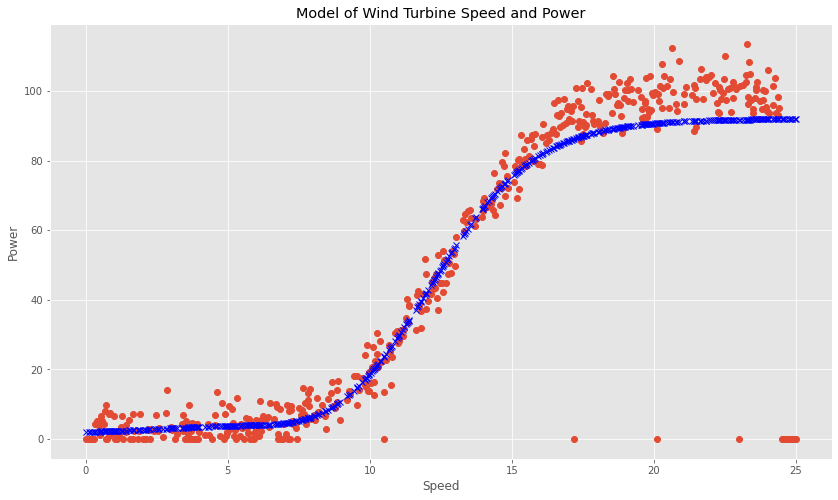

In [7]:
# Plot style.
plt.style.use("ggplot")
# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

# Plot the values.
plt.plot(powerProductionData['speed'], powerProductionData['power'], 'o');
plt.plot(powerProductionData['speed'], model.predict(powerProductionData['speed']), 'bx');

#label the x axis 
plt.xlabel('Speed')
#label the y axis 
plt.ylabel('Power')
# Set the title
plt.title('Model of Wind Turbine Speed and Power')

The second way i tried to do this model was using three layers with an activation layer of relu. I got a good loss, around mid 70s. But the graph was a bit all over the place. I next tried to add extra layers to the model and still no luck, I was getting a loss of 200 to 300. I next tried to change the activation layers and found that it improved the loss and the graph. I also experimented with different epochs and batch size values. 

# Second Attempt

In [8]:
x = powerProductionData.iloc[:,0].values
y = powerProductionData.iloc[:,1].values
xx = np.array(x)
yy = np.array(y)

#https://keras.io/api/layers/core_layers/input/
input1 = kr.Input(shape=(1,))

#https://keras.io/api/layers/activations/
l1 = Dense(10, activation='sigmoid')(input1)
l2 = Dense(50, activation='sigmoid')(l1)
l3 = Dense(50, activation='sigmoid')(l2)
l4 = Dense(50, activation='sigmoid')(l3)
l5 = Dense(50, activation='sigmoid')(l4)
l6 = Dense(50, activation='sigmoid')(l5)
l7 = Dense(50, activation='linear')(l6)
out = Dense(1)(l7)

model = Model(inputs=input1, outputs=[out])
model.compile(
    optimizer='adam',
    loss=['mean_squared_error'],
    metrics=['accuracy']
    )

modelHistory = model.fit(xx, yy, epochs=10000, batch_size=500)
model.predict([1.001])

Epoch 1/10000
1/1 [==============================] - 0s 2ms/step - loss: 3996.6541 - accuracy: 0.0980
Epoch 2/10000
1/1 [==============================] - 0s 2ms/step - loss: 3965.1160 - accuracy: 0.0000e+00
Epoch 3/10000
1/1 [==============================] - 0s 3ms/step - loss: 3933.7803 - accuracy: 0.0000e+00
Epoch 4/10000
1/1 [==============================] - 0s 3ms/step - loss: 3902.6282 - accuracy: 0.0000e+00
Epoch 5/10000
1/1 [==============================] - 0s 3ms/step - loss: 3871.6360 - accuracy: 0.0000e+00
Epoch 6/10000
1/1 [==============================] - 0s 2ms/step - loss: 3840.7705 - accuracy: 0.0000e+00
Epoch 7/10000
1/1 [==============================] - 0s 3ms/step - loss: 3809.9890 - accuracy: 0.0000e+00
Epoch 8/10000
1/1 [==============================] - 0s 2ms/step - loss: 3779.2524 - accuracy: 0.0000e+00
Epoch 9/10000
1/1 [==============================] - 0s 2ms/step - loss: 3748.5215 - accuracy: 0.0000e+00
Epoch 10/10000
1/1 [==============================

1/1 [==============================] - 0s 2ms/step - loss: 1761.9520 - accuracy: 0.0000e+00
Epoch 78/10000
1/1 [==============================] - 0s 2ms/step - loss: 1755.8425 - accuracy: 0.0000e+00
Epoch 79/10000
1/1 [==============================] - 0s 3ms/step - loss: 1750.5282 - accuracy: 0.0000e+00
Epoch 80/10000
1/1 [==============================] - 0s 2ms/step - loss: 1745.9530 - accuracy: 0.0000e+00
Epoch 81/10000
1/1 [==============================] - 0s 2ms/step - loss: 1742.0597 - accuracy: 0.0000e+00
Epoch 82/10000
1/1 [==============================] - 0s 2ms/step - loss: 1738.7903 - accuracy: 0.0000e+00
Epoch 83/10000
1/1 [==============================] - 0s 2ms/step - loss: 1736.0865 - accuracy: 0.0000e+00
Epoch 84/10000
1/1 [==============================] - 0s 1ms/step - loss: 1733.8903 - accuracy: 0.0000e+00
Epoch 85/10000
1/1 [==============================] - 0s 2ms/step - loss: 1732.1450 - accuracy: 0.0000e+00
Epoch 86/10000
1/1 [==============================] 

1/1 [==============================] - 0s 2ms/step - loss: 1728.0660 - accuracy: 0.0000e+00
Epoch 154/10000
1/1 [==============================] - 0s 2ms/step - loss: 1728.0593 - accuracy: 0.0000e+00
Epoch 155/10000
1/1 [==============================] - 0s 2ms/step - loss: 1728.0527 - accuracy: 0.0000e+00
Epoch 156/10000
1/1 [==============================] - 0s 2ms/step - loss: 1728.0463 - accuracy: 0.0000e+00
Epoch 157/10000
1/1 [==============================] - 0s 2ms/step - loss: 1728.0397 - accuracy: 0.0000e+00
Epoch 158/10000
1/1 [==============================] - 0s 999us/step - loss: 1728.0331 - accuracy: 0.0000e+00
Epoch 159/10000
1/1 [==============================] - 0s 2ms/step - loss: 1728.0266 - accuracy: 0.0000e+00
Epoch 160/10000
1/1 [==============================] - 0s 3ms/step - loss: 1728.0203 - accuracy: 0.0000e+00
Epoch 161/10000
1/1 [==============================] - 0s 2ms/step - loss: 1728.0140 - accuracy: 0.0000e+00
Epoch 162/10000
1/1 [=====================

1/1 [==============================] - 0s 2ms/step - loss: 1727.3478 - accuracy: 0.0000e+00
Epoch 229/10000
1/1 [==============================] - 0s 2ms/step - loss: 1727.3298 - accuracy: 0.0000e+00
Epoch 230/10000
1/1 [==============================] - 0s 3ms/step - loss: 1727.3113 - accuracy: 0.0000e+00
Epoch 231/10000
1/1 [==============================] - 0s 2ms/step - loss: 1727.2925 - accuracy: 0.0000e+00
Epoch 232/10000
1/1 [==============================] - 0s 2ms/step - loss: 1727.2732 - accuracy: 0.0000e+00
Epoch 233/10000
1/1 [==============================] - 0s 2ms/step - loss: 1727.2538 - accuracy: 0.0000e+00
Epoch 234/10000
1/1 [==============================] - 0s 2ms/step - loss: 1727.2335 - accuracy: 0.0000e+00
Epoch 235/10000
1/1 [==============================] - 0s 2ms/step - loss: 1727.2130 - accuracy: 0.0000e+00
Epoch 236/10000
1/1 [==============================] - 0s 2ms/step - loss: 1727.1920 - accuracy: 0.0000e+00
Epoch 237/10000
1/1 [=======================

1/1 [==============================] - 0s 1ms/step - loss: 1722.9583 - accuracy: 0.0000e+00
Epoch 303/10000
1/1 [==============================] - 0s 2ms/step - loss: 1722.7698 - accuracy: 0.0000e+00
Epoch 304/10000
1/1 [==============================] - 0s 1ms/step - loss: 1722.5710 - accuracy: 0.0000e+00
Epoch 305/10000
1/1 [==============================] - 0s 998us/step - loss: 1722.3612 - accuracy: 0.0000e+00
Epoch 306/10000
1/1 [==============================] - 0s 2ms/step - loss: 1722.1395 - accuracy: 0.0000e+00
Epoch 307/10000
1/1 [==============================] - 0s 2ms/step - loss: 1721.9053 - accuracy: 0.0000e+00
Epoch 308/10000
1/1 [==============================] - 0s 2ms/step - loss: 1721.6572 - accuracy: 0.0000e+00
Epoch 309/10000
1/1 [==============================] - 0s 1ms/step - loss: 1721.3945 - accuracy: 0.0000e+00
Epoch 310/10000
1/1 [==============================] - 0s 2ms/step - loss: 1721.1160 - accuracy: 0.0000e+00
Epoch 311/10000
1/1 [=====================

1/1 [==============================] - 0s 2ms/step - loss: 1255.6411 - accuracy: 0.0000e+00
Epoch 378/10000
1/1 [==============================] - 0s 1ms/step - loss: 1233.2858 - accuracy: 0.0000e+00
Epoch 379/10000
1/1 [==============================] - 0s 2ms/step - loss: 1210.8044 - accuracy: 0.0000e+00
Epoch 380/10000
1/1 [==============================] - 0s 2ms/step - loss: 1188.2689 - accuracy: 0.0000e+00
Epoch 381/10000
1/1 [==============================] - 0s 2ms/step - loss: 1165.7253 - accuracy: 0.0000e+00
Epoch 382/10000
1/1 [==============================] - 0s 2ms/step - loss: 1143.2367 - accuracy: 0.0000e+00
Epoch 383/10000
1/1 [==============================] - 0s 2ms/step - loss: 1120.8583 - accuracy: 0.0000e+00
Epoch 384/10000
1/1 [==============================] - 0s 2ms/step - loss: 1098.6271 - accuracy: 0.0000e+00
Epoch 385/10000
1/1 [==============================] - 0s 998us/step - loss: 1076.6007 - accuracy: 0.0000e+00
Epoch 386/10000
1/1 [=====================

1/1 [==============================] - 0s 2ms/step - loss: 381.8055 - accuracy: 0.0000e+00
Epoch 454/10000
1/1 [==============================] - 0s 1ms/step - loss: 378.9572 - accuracy: 0.0000e+00
Epoch 455/10000
1/1 [==============================] - 0s 2ms/step - loss: 376.1602 - accuracy: 0.0000e+00
Epoch 456/10000
1/1 [==============================] - 0s 2ms/step - loss: 373.4090 - accuracy: 0.0000e+00
Epoch 457/10000
1/1 [==============================] - 0s 2ms/step - loss: 370.6962 - accuracy: 0.0000e+00
Epoch 458/10000
1/1 [==============================] - 0s 2ms/step - loss: 368.0181 - accuracy: 0.0000e+00
Epoch 459/10000
1/1 [==============================] - 0s 2ms/step - loss: 365.3694 - accuracy: 0.0000e+00
Epoch 460/10000
1/1 [==============================] - 0s 2ms/step - loss: 362.7451 - accuracy: 0.0000e+00
Epoch 461/10000
1/1 [==============================] - 0s 2ms/step - loss: 360.1429 - accuracy: 0.0000e+00
Epoch 462/10000
1/1 [==============================] 

1/1 [==============================] - 0s 2ms/step - loss: 265.5506 - accuracy: 0.0000e+00
Epoch 530/10000
1/1 [==============================] - 0s 787us/step - loss: 265.1271 - accuracy: 0.0000e+00
Epoch 531/10000
1/1 [==============================] - 0s 2ms/step - loss: 264.7137 - accuracy: 0.0000e+00
Epoch 532/10000
1/1 [==============================] - 0s 778us/step - loss: 264.3114 - accuracy: 0.0000e+00
Epoch 533/10000
1/1 [==============================] - 0s 2ms/step - loss: 263.9257 - accuracy: 0.0000e+00
Epoch 534/10000
1/1 [==============================] - 0s 2ms/step - loss: 263.5544 - accuracy: 0.0000e+00
Epoch 535/10000
1/1 [==============================] - 0s 2ms/step - loss: 263.1923 - accuracy: 0.0000e+00
Epoch 536/10000
1/1 [==============================] - 0s 2ms/step - loss: 262.8404 - accuracy: 0.0000e+00
Epoch 537/10000
1/1 [==============================] - 0s 3ms/step - loss: 262.5017 - accuracy: 0.0000e+00
Epoch 538/10000
1/1 [============================

1/1 [==============================] - 0s 2ms/step - loss: 252.7874 - accuracy: 0.0000e+00
Epoch 606/10000
1/1 [==============================] - 0s 2ms/step - loss: 252.7369 - accuracy: 0.0000e+00
Epoch 607/10000
1/1 [==============================] - 0s 2ms/step - loss: 252.6876 - accuracy: 0.0000e+00
Epoch 608/10000
1/1 [==============================] - 0s 2ms/step - loss: 252.6393 - accuracy: 0.0000e+00
Epoch 609/10000
1/1 [==============================] - 0s 3ms/step - loss: 252.5921 - accuracy: 0.0000e+00
Epoch 610/10000
1/1 [==============================] - 0s 2ms/step - loss: 252.5459 - accuracy: 0.0000e+00
Epoch 611/10000
1/1 [==============================] - 0s 949us/step - loss: 252.5007 - accuracy: 0.0000e+00
Epoch 612/10000
1/1 [==============================] - 0s 1ms/step - loss: 252.4564 - accuracy: 0.0000e+00
Epoch 613/10000
1/1 [==============================] - 0s 999us/step - loss: 252.4132 - accuracy: 0.0000e+00
Epoch 614/10000
1/1 [============================

1/1 [==============================] - 0s 2ms/step - loss: 250.6876 - accuracy: 0.0000e+00
Epoch 682/10000
1/1 [==============================] - 0s 1ms/step - loss: 250.6719 - accuracy: 0.0000e+00
Epoch 683/10000
1/1 [==============================] - 0s 2ms/step - loss: 250.6564 - accuracy: 0.0000e+00
Epoch 684/10000
1/1 [==============================] - 0s 2ms/step - loss: 250.6410 - accuracy: 0.0000e+00
Epoch 685/10000
1/1 [==============================] - 0s 2ms/step - loss: 250.6258 - accuracy: 0.0000e+00
Epoch 686/10000
1/1 [==============================] - 0s 2ms/step - loss: 250.6107 - accuracy: 0.0000e+00
Epoch 687/10000
1/1 [==============================] - 0s 2ms/step - loss: 250.5957 - accuracy: 0.0000e+00
Epoch 688/10000
1/1 [==============================] - 0s 2ms/step - loss: 250.5808 - accuracy: 0.0000e+00
Epoch 689/10000
1/1 [==============================] - 0s 2ms/step - loss: 250.5662 - accuracy: 0.0000e+00
Epoch 690/10000
1/1 [==============================] 

1/1 [==============================] - 0s 1ms/step - loss: 249.7681 - accuracy: 0.0000e+00
Epoch 758/10000
1/1 [==============================] - 0s 3ms/step - loss: 249.7587 - accuracy: 0.0000e+00
Epoch 759/10000
1/1 [==============================] - 0s 2ms/step - loss: 249.7494 - accuracy: 0.0000e+00
Epoch 760/10000
1/1 [==============================] - 0s 2ms/step - loss: 249.7400 - accuracy: 0.0000e+00
Epoch 761/10000
1/1 [==============================] - 0s 2ms/step - loss: 249.7308 - accuracy: 0.0000e+00
Epoch 762/10000
1/1 [==============================] - 0s 1ms/step - loss: 249.7216 - accuracy: 0.0000e+00
Epoch 763/10000
1/1 [==============================] - 0s 2ms/step - loss: 249.7125 - accuracy: 0.0000e+00
Epoch 764/10000
1/1 [==============================] - 0s 999us/step - loss: 249.7035 - accuracy: 0.0000e+00
Epoch 765/10000
1/1 [==============================] - 0s 2ms/step - loss: 249.6945 - accuracy: 0.0000e+00
Epoch 766/10000
1/1 [==============================

1/1 [==============================] - 0s 3ms/step - loss: 249.2087 - accuracy: 0.0000e+00
Epoch 834/10000
1/1 [==============================] - 0s 3ms/step - loss: 249.2030 - accuracy: 0.0000e+00
Epoch 835/10000
1/1 [==============================] - 0s 2ms/step - loss: 249.1972 - accuracy: 0.0000e+00
Epoch 836/10000
1/1 [==============================] - 0s 2ms/step - loss: 249.1915 - accuracy: 0.0000e+00
Epoch 837/10000
1/1 [==============================] - 0s 1ms/step - loss: 249.1858 - accuracy: 0.0000e+00
Epoch 838/10000
1/1 [==============================] - 0s 1ms/step - loss: 249.1802 - accuracy: 0.0000e+00
Epoch 839/10000
1/1 [==============================] - 0s 2ms/step - loss: 249.1746 - accuracy: 0.0000e+00
Epoch 840/10000
1/1 [==============================] - 0s 2ms/step - loss: 249.1689 - accuracy: 0.0000e+00
Epoch 841/10000
1/1 [==============================] - 0s 2ms/step - loss: 249.1633 - accuracy: 0.0000e+00
Epoch 842/10000
1/1 [==============================] 

1/1 [==============================] - 0s 1ms/step - loss: 248.8568 - accuracy: 0.0000e+00
Epoch 910/10000
1/1 [==============================] - 0s 999us/step - loss: 248.8525 - accuracy: 0.0000e+00
Epoch 911/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.8484 - accuracy: 0.0000e+00
Epoch 912/10000
1/1 [==============================] - 0s 1ms/step - loss: 248.8453 - accuracy: 0.0000e+00
Epoch 913/10000
1/1 [==============================] - 0s 1ms/step - loss: 248.8420 - accuracy: 0.0000e+00
Epoch 914/10000
1/1 [==============================] - 0s 972us/step - loss: 248.8380 - accuracy: 0.0000e+00
Epoch 915/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.8342 - accuracy: 0.0000e+00
Epoch 916/10000
1/1 [==============================] - 0s 997us/step - loss: 248.8309 - accuracy: 0.0000e+00
Epoch 917/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.8275 - accuracy: 0.0000e+00
Epoch 918/10000
1/1 [==========================

1/1 [==============================] - 0s 1ms/step - loss: 248.6104 - accuracy: 0.0000e+00
Epoch 986/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.6075 - accuracy: 0.0000e+00
Epoch 987/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.6046 - accuracy: 0.0000e+00
Epoch 988/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.6016 - accuracy: 0.0000e+00
Epoch 989/10000
1/1 [==============================] - 0s 999us/step - loss: 248.5988 - accuracy: 0.0000e+00
Epoch 990/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.5958 - accuracy: 0.0000e+00
Epoch 991/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.5929 - accuracy: 0.0000e+00
Epoch 992/10000
1/1 [==============================] - 0s 4ms/step - loss: 248.5900 - accuracy: 0.0000e+00
Epoch 993/10000
1/1 [==============================] - 0s 3ms/step - loss: 248.5872 - accuracy: 0.0000e+00
Epoch 994/10000
1/1 [==============================

1/1 [==============================] - 0s 2ms/step - loss: 248.4039 - accuracy: 0.0000e+00
Epoch 1061/10000
1/1 [==============================] - 0s 1ms/step - loss: 248.4013 - accuracy: 0.0000e+00
Epoch 1062/10000
1/1 [==============================] - 0s 999us/step - loss: 248.3986 - accuracy: 0.0000e+00
Epoch 1063/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.3961 - accuracy: 0.0000e+00
Epoch 1064/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.3935 - accuracy: 0.0000e+00
Epoch 1065/10000
1/1 [==============================] - 0s 946us/step - loss: 248.3909 - accuracy: 0.0000e+00
Epoch 1066/10000
1/1 [==============================] - 0s 1ms/step - loss: 248.3883 - accuracy: 0.0000e+00
Epoch 1067/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.3857 - accuracy: 0.0000e+00
Epoch 1068/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.3831 - accuracy: 0.0000e+00
Epoch 1069/10000
1/1 [===================

1/1 [==============================] - 0s 999us/step - loss: 248.2173 - accuracy: 0.0000e+00
Epoch 1136/10000
1/1 [==============================] - 0s 942us/step - loss: 248.2145 - accuracy: 0.0000e+00
Epoch 1137/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.2125 - accuracy: 0.0000e+00
Epoch 1138/10000
1/1 [==============================] - 0s 997us/step - loss: 248.2105 - accuracy: 0.0000e+00
Epoch 1139/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.2080 - accuracy: 0.0000e+00
Epoch 1140/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.2052 - accuracy: 0.0000e+00
Epoch 1141/10000
1/1 [==============================] - 0s 1ms/step - loss: 248.2026 - accuracy: 0.0000e+00
Epoch 1142/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.2004 - accuracy: 0.0000e+00
Epoch 1143/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.1983 - accuracy: 0.0000e+00
Epoch 1144/10000
1/1 [=================

1/1 [==============================] - 0s 1ms/step - loss: 248.0348 - accuracy: 0.0000e+00
Epoch 1211/10000
1/1 [==============================] - 0s 1ms/step - loss: 248.0322 - accuracy: 0.0000e+00
Epoch 1212/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.0296 - accuracy: 0.0000e+00
Epoch 1213/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.0271 - accuracy: 0.0000e+00
Epoch 1214/10000
1/1 [==============================] - 0s 1ms/step - loss: 248.0245 - accuracy: 0.0000e+00
Epoch 1215/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.0219 - accuracy: 0.0000e+00
Epoch 1216/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.0193 - accuracy: 0.0000e+00
Epoch 1217/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.0167 - accuracy: 0.0000e+00
Epoch 1218/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.0141 - accuracy: 0.0000e+00
Epoch 1219/10000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 247.8024 - accuracy: 0.0000e+00
Epoch 1286/10000
1/1 [==============================] - 0s 1ms/step - loss: 247.7983 - accuracy: 0.0000e+00
Epoch 1287/10000
1/1 [==============================] - 0s 2ms/step - loss: 247.7941 - accuracy: 0.0000e+00
Epoch 1288/10000
1/1 [==============================] - 0s 3ms/step - loss: 247.7899 - accuracy: 0.0000e+00
Epoch 1289/10000
1/1 [==============================] - 0s 997us/step - loss: 247.7857 - accuracy: 0.0000e+00
Epoch 1290/10000
1/1 [==============================] - 0s 949us/step - loss: 247.7814 - accuracy: 0.0000e+00
Epoch 1291/10000
1/1 [==============================] - 0s 840us/step - loss: 247.7771 - accuracy: 0.0000e+00
Epoch 1292/10000
1/1 [==============================] - 0s 2ms/step - loss: 247.7727 - accuracy: 0.0000e+00
Epoch 1293/10000
1/1 [==============================] - 0s 2ms/step - loss: 247.7683 - accuracy: 0.0000e+00
Epoch 1294/10000
1/1 [=================

1/1 [==============================] - 0s 1ms/step - loss: 247.2082 - accuracy: 0.0000e+00
Epoch 1361/10000
1/1 [==============================] - 0s 2ms/step - loss: 247.1948 - accuracy: 0.0000e+00
Epoch 1362/10000
1/1 [==============================] - 0s 2ms/step - loss: 247.1837 - accuracy: 0.0000e+00
Epoch 1363/10000
1/1 [==============================] - 0s 2ms/step - loss: 247.1759 - accuracy: 0.0000e+00
Epoch 1364/10000
1/1 [==============================] - 0s 952us/step - loss: 247.1726 - accuracy: 0.0000e+00
Epoch 1365/10000
1/1 [==============================] - 0s 2ms/step - loss: 247.1660 - accuracy: 0.0000e+00
Epoch 1366/10000
1/1 [==============================] - 0s 1ms/step - loss: 247.1470 - accuracy: 0.0000e+00
Epoch 1367/10000
1/1 [==============================] - 0s 914us/step - loss: 247.1057 - accuracy: 0.0000e+00
Epoch 1368/10000
1/1 [==============================] - 0s 861us/step - loss: 247.0630 - accuracy: 0.0000e+00
Epoch 1369/10000
1/1 [=================

1/1 [==============================] - 0s 2ms/step - loss: 244.6131 - accuracy: 0.0000e+00
Epoch 1436/10000
1/1 [==============================] - 0s 1ms/step - loss: 244.5419 - accuracy: 0.0000e+00
Epoch 1437/10000
1/1 [==============================] - 0s 2ms/step - loss: 244.4682 - accuracy: 0.0000e+00
Epoch 1438/10000
1/1 [==============================] - 0s 2ms/step - loss: 244.3917 - accuracy: 0.0000e+00
Epoch 1439/10000
1/1 [==============================] - 0s 995us/step - loss: 244.3123 - accuracy: 0.0000e+00
Epoch 1440/10000
1/1 [==============================] - 0s 995us/step - loss: 244.2299 - accuracy: 0.0000e+00
Epoch 1441/10000
1/1 [==============================] - 0s 1ms/step - loss: 244.1444 - accuracy: 0.0000e+00
Epoch 1442/10000
1/1 [==============================] - 0s 1ms/step - loss: 244.0557 - accuracy: 0.0000e+00
Epoch 1443/10000
1/1 [==============================] - 0s 2ms/step - loss: 243.9637 - accuracy: 0.0000e+00
Epoch 1444/10000
1/1 [===================

1/1 [==============================] - 0s 1ms/step - loss: 233.2893 - accuracy: 0.0000e+00
Epoch 1511/10000
1/1 [==============================] - 0s 2ms/step - loss: 233.0400 - accuracy: 0.0000e+00
Epoch 1512/10000
1/1 [==============================] - 0s 996us/step - loss: 232.7822 - accuracy: 0.0000e+00
Epoch 1513/10000
1/1 [==============================] - 0s 2ms/step - loss: 232.5161 - accuracy: 0.0000e+00
Epoch 1514/10000
1/1 [==============================] - 0s 1ms/step - loss: 232.2462 - accuracy: 0.0000e+00
Epoch 1515/10000
1/1 [==============================] - 0s 1ms/step - loss: 231.9713 - accuracy: 0.0000e+00
Epoch 1516/10000
1/1 [==============================] - 0s 999us/step - loss: 231.6875 - accuracy: 0.0000e+00
Epoch 1517/10000
1/1 [==============================] - 0s 2ms/step - loss: 231.3955 - accuracy: 0.0000e+00
Epoch 1518/10000
1/1 [==============================] - 0s 2ms/step - loss: 231.0982 - accuracy: 0.0000e+00
Epoch 1519/10000
1/1 [===================

1/1 [==============================] - 0s 2ms/step - loss: 193.4215 - accuracy: 0.0000e+00
Epoch 1586/10000
1/1 [==============================] - 0s 2ms/step - loss: 192.9130 - accuracy: 0.0000e+00
Epoch 1587/10000
1/1 [==============================] - 0s 996us/step - loss: 192.1898 - accuracy: 0.0000e+00
Epoch 1588/10000
1/1 [==============================] - 0s 999us/step - loss: 191.3494 - accuracy: 0.0000e+00
Epoch 1589/10000
1/1 [==============================] - 0s 2ms/step - loss: 190.3367 - accuracy: 0.0000e+00
Epoch 1590/10000
1/1 [==============================] - 0s 1ms/step - loss: 189.5007 - accuracy: 0.0000e+00
Epoch 1591/10000
1/1 [==============================] - 0s 2ms/step - loss: 188.8816 - accuracy: 0.0000e+00
Epoch 1592/10000
1/1 [==============================] - 0s 2ms/step - loss: 188.3482 - accuracy: 0.0000e+00
Epoch 1593/10000
1/1 [==============================] - 0s 2ms/step - loss: 187.8119 - accuracy: 0.0000e+00
Epoch 1594/10000
1/1 [===================

1/1 [==============================] - 0s 2ms/step - loss: 140.5804 - accuracy: 0.0000e+00
Epoch 1661/10000
1/1 [==============================] - 0s 1ms/step - loss: 140.0071 - accuracy: 0.0000e+00
Epoch 1662/10000
1/1 [==============================] - 0s 2ms/step - loss: 139.2083 - accuracy: 0.0000e+00
Epoch 1663/10000
1/1 [==============================] - 0s 911us/step - loss: 138.1987 - accuracy: 0.0000e+00
Epoch 1664/10000
1/1 [==============================] - 0s 2ms/step - loss: 137.4956 - accuracy: 0.0000e+00
Epoch 1665/10000
1/1 [==============================] - 0s 2ms/step - loss: 137.1434 - accuracy: 0.0000e+00
Epoch 1666/10000
1/1 [==============================] - 0s 1ms/step - loss: 136.9849 - accuracy: 0.0000e+00
Epoch 1667/10000
1/1 [==============================] - 0s 998us/step - loss: 136.8921 - accuracy: 0.0000e+00
Epoch 1668/10000
1/1 [==============================] - 0s 995us/step - loss: 136.4913 - accuracy: 0.0000e+00
Epoch 1669/10000
1/1 [=================

1/1 [==============================] - 0s 915us/step - loss: 112.9955 - accuracy: 0.0000e+00
Epoch 1736/10000
1/1 [==============================] - 0s 1ms/step - loss: 112.8262 - accuracy: 0.0000e+00
Epoch 1737/10000
1/1 [==============================] - 0s 1ms/step - loss: 112.7448 - accuracy: 0.0000e+00
Epoch 1738/10000
1/1 [==============================] - 0s 1ms/step - loss: 112.7307 - accuracy: 0.0000e+00
Epoch 1739/10000
1/1 [==============================] - 0s 2ms/step - loss: 112.7435 - accuracy: 0.0000e+00
Epoch 1740/10000
1/1 [==============================] - 0s 909us/step - loss: 112.7783 - accuracy: 0.0000e+00
Epoch 1741/10000
1/1 [==============================] - 0s 2ms/step - loss: 112.6987 - accuracy: 0.0000e+00
Epoch 1742/10000
1/1 [==============================] - 0s 2ms/step - loss: 112.4887 - accuracy: 0.0000e+00
Epoch 1743/10000
1/1 [==============================] - 0s 918us/step - loss: 112.0241 - accuracy: 0.0000e+00
Epoch 1744/10000
1/1 [=================

1/1 [==============================] - 0s 2ms/step - loss: 99.0140 - accuracy: 0.0000e+00
Epoch 1811/10000
1/1 [==============================] - 0s 2ms/step - loss: 98.7732 - accuracy: 0.0000e+00
Epoch 1812/10000
1/1 [==============================] - 0s 973us/step - loss: 98.6273 - accuracy: 0.0000e+00
Epoch 1813/10000
1/1 [==============================] - 0s 1ms/step - loss: 98.5549 - accuracy: 0.0000e+00
Epoch 1814/10000
1/1 [==============================] - 0s 1000us/step - loss: 98.5333 - accuracy: 0.0000e+00
Epoch 1815/10000
1/1 [==============================] - 0s 981us/step - loss: 98.5571 - accuracy: 0.0000e+00
Epoch 1816/10000
1/1 [==============================] - 0s 1ms/step - loss: 98.6002 - accuracy: 0.0000e+00
Epoch 1817/10000
1/1 [==============================] - 0s 2ms/step - loss: 98.6939 - accuracy: 0.0000e+00
Epoch 1818/10000
1/1 [==============================] - 0s 829us/step - loss: 98.7455 - accuracy: 0.0000e+00
Epoch 1819/10000
1/1 [=======================

1/1 [==============================] - 0s 963us/step - loss: 93.1689 - accuracy: 0.0000e+00
Epoch 1886/10000
1/1 [==============================] - 0s 2ms/step - loss: 92.8824 - accuracy: 0.0000e+00
Epoch 1887/10000
1/1 [==============================] - 0s 2ms/step - loss: 92.6277 - accuracy: 0.0000e+00
Epoch 1888/10000
1/1 [==============================] - 0s 2ms/step - loss: 92.2604 - accuracy: 0.0000e+00
Epoch 1889/10000
1/1 [==============================] - 0s 1ms/step - loss: 91.9830 - accuracy: 0.0000e+00
Epoch 1890/10000
1/1 [==============================] - 0s 2ms/step - loss: 91.7776 - accuracy: 0.0000e+00
Epoch 1891/10000
1/1 [==============================] - 0s 1ms/step - loss: 91.6656 - accuracy: 0.0000e+00
Epoch 1892/10000
1/1 [==============================] - 0s 1ms/step - loss: 91.6277 - accuracy: 0.0000e+00
Epoch 1893/10000
1/1 [==============================] - 0s 1ms/step - loss: 91.6416 - accuracy: 0.0000e+00
Epoch 1894/10000
1/1 [==============================

1/1 [==============================] - 0s 2ms/step - loss: 88.2470 - accuracy: 0.0000e+00
Epoch 1962/10000
1/1 [==============================] - 0s 2ms/step - loss: 88.2051 - accuracy: 0.0000e+00
Epoch 1963/10000
1/1 [==============================] - 0s 1ms/step - loss: 88.1655 - accuracy: 0.0000e+00
Epoch 1964/10000
1/1 [==============================] - 0s 962us/step - loss: 88.1274 - accuracy: 0.0000e+00
Epoch 1965/10000
1/1 [==============================] - 0s 2ms/step - loss: 88.0905 - accuracy: 0.0000e+00
Epoch 1966/10000
1/1 [==============================] - 0s 2ms/step - loss: 88.0555 - accuracy: 0.0000e+00
Epoch 1967/10000
1/1 [==============================] - 0s 1ms/step - loss: 88.0226 - accuracy: 0.0000e+00
Epoch 1968/10000
1/1 [==============================] - 0s 593us/step - loss: 87.9941 - accuracy: 0.0000e+00
Epoch 1969/10000
1/1 [==============================] - 0s 2ms/step - loss: 87.9724 - accuracy: 0.0000e+00
Epoch 1970/10000
1/1 [============================

1/1 [==============================] - 0s 2ms/step - loss: 86.5468 - accuracy: 0.0040
Epoch 2040/10000
1/1 [==============================] - 0s 2ms/step - loss: 86.4678 - accuracy: 0.0080
Epoch 2041/10000
1/1 [==============================] - 0s 1000us/step - loss: 86.4581 - accuracy: 0.0040
Epoch 2042/10000
1/1 [==============================] - 0s 2ms/step - loss: 86.2976 - accuracy: 0.0080
Epoch 2043/10000
1/1 [==============================] - 0s 1ms/step - loss: 86.1944 - accuracy: 0.0040
Epoch 2044/10000
1/1 [==============================] - 0s 2ms/step - loss: 86.0157 - accuracy: 0.0080
Epoch 2045/10000
1/1 [==============================] - 0s 2ms/step - loss: 85.8866 - accuracy: 0.0060
Epoch 2046/10000
1/1 [==============================] - 0s 999us/step - loss: 85.7551 - accuracy: 0.0080
Epoch 2047/10000
1/1 [==============================] - 0s 2ms/step - loss: 85.6615 - accuracy: 0.0060
Epoch 2048/10000
1/1 [==============================] - 0s 1ms/step - loss: 85.5894 -

1/1 [==============================] - 0s 2ms/step - loss: 84.4643 - accuracy: 0.0100
Epoch 2119/10000
1/1 [==============================] - 0s 1000us/step - loss: 84.5652 - accuracy: 0.0080
Epoch 2120/10000
1/1 [==============================] - 0s 1ms/step - loss: 84.5948 - accuracy: 0.0100
Epoch 2121/10000
1/1 [==============================] - 0s 2ms/step - loss: 84.6934 - accuracy: 0.0080
Epoch 2122/10000
1/1 [==============================] - 0s 2ms/step - loss: 84.6610 - accuracy: 0.0100
Epoch 2123/10000
1/1 [==============================] - 0s 1ms/step - loss: 84.6950 - accuracy: 0.0080
Epoch 2124/10000
1/1 [==============================] - 0s 2ms/step - loss: 84.5719 - accuracy: 0.0100
Epoch 2125/10000
1/1 [==============================] - 0s 2ms/step - loss: 84.5043 - accuracy: 0.0080
Epoch 2126/10000
1/1 [==============================] - 0s 2ms/step - loss: 84.3327 - accuracy: 0.0100
Epoch 2127/10000
1/1 [==============================] - 0s 1ms/step - loss: 84.2102 - a

1/1 [==============================] - 0s 2ms/step - loss: 84.2871 - accuracy: 0.0120
Epoch 2198/10000
1/1 [==============================] - 0s 911us/step - loss: 84.9580 - accuracy: 0.0080
Epoch 2199/10000
1/1 [==============================] - 0s 2ms/step - loss: 84.8291 - accuracy: 0.0120
Epoch 2200/10000
1/1 [==============================] - 0s 1ms/step - loss: 84.8707 - accuracy: 0.0080
Epoch 2201/10000
1/1 [==============================] - 0s 2ms/step - loss: 84.0117 - accuracy: 0.0120
Epoch 2202/10000
1/1 [==============================] - 0s 2ms/step - loss: 83.3904 - accuracy: 0.0100
Epoch 2203/10000
1/1 [==============================] - 0s 2ms/step - loss: 82.8623 - accuracy: 0.0120
Epoch 2204/10000
1/1 [==============================] - 0s 1ms/step - loss: 82.6703 - accuracy: 0.0120
Epoch 2205/10000
1/1 [==============================] - 0s 549us/step - loss: 82.7593 - accuracy: 0.0120
Epoch 2206/10000
1/1 [==============================] - 0s 2ms/step - loss: 83.0159 - 

1/1 [==============================] - 0s 1ms/step - loss: 82.0310 - accuracy: 0.0120
Epoch 2277/10000
1/1 [==============================] - 0s 2ms/step - loss: 82.0843 - accuracy: 0.0120
Epoch 2278/10000
1/1 [==============================] - 0s 2ms/step - loss: 82.1104 - accuracy: 0.0120
Epoch 2279/10000
1/1 [==============================] - 0s 888us/step - loss: 82.1694 - accuracy: 0.0120
Epoch 2280/10000
1/1 [==============================] - 0s 2ms/step - loss: 82.1806 - accuracy: 0.0120
Epoch 2281/10000
1/1 [==============================] - 0s 680us/step - loss: 82.2314 - accuracy: 0.0120
Epoch 2282/10000
1/1 [==============================] - 0s 1ms/step - loss: 82.2123 - accuracy: 0.0120
Epoch 2283/10000
1/1 [==============================] - 0s 990us/step - loss: 82.2335 - accuracy: 0.0120
Epoch 2284/10000
1/1 [==============================] - 0s 2ms/step - loss: 82.1745 - accuracy: 0.0120
Epoch 2285/10000
1/1 [==============================] - 0s 1ms/step - loss: 82.1516 

1/1 [==============================] - 0s 1ms/step - loss: 81.0599 - accuracy: 0.0120
Epoch 2356/10000
1/1 [==============================] - 0s 2ms/step - loss: 81.0628 - accuracy: 0.0120
Epoch 2357/10000
1/1 [==============================] - 0s 2ms/step - loss: 81.0728 - accuracy: 0.0120
Epoch 2358/10000
1/1 [==============================] - 0s 912us/step - loss: 81.0770 - accuracy: 0.0120
Epoch 2359/10000
1/1 [==============================] - 0s 2ms/step - loss: 81.0925 - accuracy: 0.0120
Epoch 2360/10000
1/1 [==============================] - 0s 2ms/step - loss: 81.1003 - accuracy: 0.0120
Epoch 2361/10000
1/1 [==============================] - 0s 2ms/step - loss: 81.1250 - accuracy: 0.0120
Epoch 2362/10000
1/1 [==============================] - 0s 1ms/step - loss: 81.1386 - accuracy: 0.0120
Epoch 2363/10000
1/1 [==============================] - 0s 1ms/step - loss: 81.1760 - accuracy: 0.0120
Epoch 2364/10000
1/1 [==============================] - 0s 2ms/step - loss: 81.1956 - ac

1/1 [==============================] - 0s 1ms/step - loss: 80.3313 - accuracy: 0.0120
Epoch 2435/10000
1/1 [==============================] - 0s 2ms/step - loss: 80.3428 - accuracy: 0.0120
Epoch 2436/10000
1/1 [==============================] - 0s 1ms/step - loss: 80.3628 - accuracy: 0.0120
Epoch 2437/10000
1/1 [==============================] - 0s 894us/step - loss: 80.3814 - accuracy: 0.0120
Epoch 2438/10000
1/1 [==============================] - 0s 997us/step - loss: 80.4154 - accuracy: 0.0120
Epoch 2439/10000
1/1 [==============================] - 0s 1ms/step - loss: 80.4456 - accuracy: 0.0120
Epoch 2440/10000
1/1 [==============================] - 0s 1ms/step - loss: 80.5017 - accuracy: 0.0120
Epoch 2441/10000
1/1 [==============================] - 0s 940us/step - loss: 80.5473 - accuracy: 0.0120
Epoch 2442/10000
1/1 [==============================] - 0s 1ms/step - loss: 80.6334 - accuracy: 0.0120
Epoch 2443/10000
1/1 [==============================] - 0s 1ms/step - loss: 80.6906 

1/1 [==============================] - 0s 1ms/step - loss: 80.5185 - accuracy: 0.0140
Epoch 2514/10000
1/1 [==============================] - 0s 998us/step - loss: 80.6721 - accuracy: 0.0120
Epoch 2515/10000
1/1 [==============================] - 0s 2ms/step - loss: 80.4235 - accuracy: 0.0140
Epoch 2516/10000
1/1 [==============================] - 0s 1ms/step - loss: 80.1080 - accuracy: 0.0120
Epoch 2517/10000
1/1 [==============================] - 0s 1ms/step - loss: 79.7634 - accuracy: 0.0120
Epoch 2518/10000
1/1 [==============================] - 0s 1ms/step - loss: 79.5928 - accuracy: 0.0120
Epoch 2519/10000
1/1 [==============================] - 0s 2ms/step - loss: 79.6162 - accuracy: 0.0120
Epoch 2520/10000
1/1 [==============================] - 0s 2ms/step - loss: 79.7644 - accuracy: 0.0120
Epoch 2521/10000
1/1 [==============================] - 0s 2ms/step - loss: 79.9366 - accuracy: 0.0120
Epoch 2522/10000
1/1 [==============================] - 0s 1ms/step - loss: 79.9961 - ac

1/1 [==============================] - 0s 2ms/step - loss: 80.6137 - accuracy: 0.0140
Epoch 2593/10000
1/1 [==============================] - 0s 1ms/step - loss: 81.0694 - accuracy: 0.0120
Epoch 2594/10000
1/1 [==============================] - 0s 1ms/step - loss: 81.0587 - accuracy: 0.0140
Epoch 2595/10000
1/1 [==============================] - 0s 1ms/step - loss: 81.1550 - accuracy: 0.0120
Epoch 2596/10000
1/1 [==============================] - 0s 2ms/step - loss: 80.6069 - accuracy: 0.0140
Epoch 2597/10000
1/1 [==============================] - 0s 2ms/step - loss: 80.1197 - accuracy: 0.0120
Epoch 2598/10000
1/1 [==============================] - 0s 2ms/step - loss: 79.5046 - accuracy: 0.0140
Epoch 2599/10000
1/1 [==============================] - 0s 1ms/step - loss: 79.1251 - accuracy: 0.0120
Epoch 2600/10000
1/1 [==============================] - 0s 2ms/step - loss: 79.0147 - accuracy: 0.0120
Epoch 2601/10000
1/1 [==============================] - 0s 2ms/step - loss: 79.1447 - accu

1/1 [==============================] - 0s 2ms/step - loss: 78.6309 - accuracy: 0.0140
Epoch 2672/10000
1/1 [==============================] - 0s 2ms/step - loss: 78.6521 - accuracy: 0.0120
Epoch 2673/10000
1/1 [==============================] - 0s 999us/step - loss: 78.6831 - accuracy: 0.0140
Epoch 2674/10000
1/1 [==============================] - 0s 1ms/step - loss: 78.7372 - accuracy: 0.0120
Epoch 2675/10000
1/1 [==============================] - 0s 914us/step - loss: 78.8112 - accuracy: 0.0140
Epoch 2676/10000
1/1 [==============================] - 0s 1ms/step - loss: 78.9406 - accuracy: 0.0120
Epoch 2677/10000
1/1 [==============================] - 0s 903us/step - loss: 79.1059 - accuracy: 0.0140
Epoch 2678/10000
1/1 [==============================] - 0s 1ms/step - loss: 79.4025 - accuracy: 0.0120
Epoch 2679/10000
1/1 [==============================] - 0s 2ms/step - loss: 79.7323 - accuracy: 0.0140
Epoch 2680/10000
1/1 [==============================] - 0s 1ms/step - loss: 80.3400 

1/1 [==============================] - 0s 2ms/step - loss: 78.1220 - accuracy: 0.0140
Epoch 2750/10000
1/1 [==============================] - 0s 2ms/step - loss: 78.1148 - accuracy: 0.0120
Epoch 2751/10000
1/1 [==============================] - 0s 2ms/step - loss: 78.1080 - accuracy: 0.0140
Epoch 2752/10000
1/1 [==============================] - 0s 2ms/step - loss: 78.1018 - accuracy: 0.0120
Epoch 2753/10000
1/1 [==============================] - 0s 2ms/step - loss: 78.0962 - accuracy: 0.0120
Epoch 2754/10000
1/1 [==============================] - 0s 2ms/step - loss: 78.0910 - accuracy: 0.0140
Epoch 2755/10000
1/1 [==============================] - 0s 1ms/step - loss: 78.0859 - accuracy: 0.0120
Epoch 2756/10000
1/1 [==============================] - 0s 999us/step - loss: 78.0809 - accuracy: 0.0140
Epoch 2757/10000
1/1 [==============================] - 0s 2ms/step - loss: 78.0758 - accuracy: 0.0120
Epoch 2758/10000
1/1 [==============================] - 0s 2ms/step - loss: 78.0704 - ac

1/1 [==============================] - 0s 2ms/step - loss: 77.7489 - accuracy: 0.0140
Epoch 2829/10000
1/1 [==============================] - 0s 2ms/step - loss: 77.7513 - accuracy: 0.0140
Epoch 2830/10000
1/1 [==============================] - 0s 2ms/step - loss: 78.0027 - accuracy: 0.0120
Epoch 2831/10000
1/1 [==============================] - 0s 2ms/step - loss: 78.1129 - accuracy: 0.0140
Epoch 2832/10000
1/1 [==============================] - 0s 2ms/step - loss: 77.9731 - accuracy: 0.0120
Epoch 2833/10000
1/1 [==============================] - 0s 2ms/step - loss: 77.7382 - accuracy: 0.0140
Epoch 2834/10000
1/1 [==============================] - 0s 2ms/step - loss: 77.6838 - accuracy: 0.0140
Epoch 2835/10000
1/1 [==============================] - 0s 4ms/step - loss: 77.8123 - accuracy: 0.0120
Epoch 2836/10000
1/1 [==============================] - 0s 1ms/step - loss: 77.9100 - accuracy: 0.0140
Epoch 2837/10000
1/1 [==============================] - 0s 2ms/step - loss: 77.8584 - accu

Epoch 2907/10000
1/1 [==============================] - 0s 2ms/step - loss: 77.3210 - accuracy: 0.0140
Epoch 2908/10000
1/1 [==============================] - 0s 2ms/step - loss: 77.3163 - accuracy: 0.0140
Epoch 2909/10000
1/1 [==============================] - 0s 1ms/step - loss: 77.3115 - accuracy: 0.0140
Epoch 2910/10000
1/1 [==============================] - 0s 1ms/step - loss: 77.3068 - accuracy: 0.0140
Epoch 2911/10000
1/1 [==============================] - 0s 1ms/step - loss: 77.3021 - accuracy: 0.0140
Epoch 2912/10000
1/1 [==============================] - 0s 968us/step - loss: 77.2972 - accuracy: 0.0140
Epoch 2913/10000
1/1 [==============================] - 0s 2ms/step - loss: 77.2925 - accuracy: 0.0140
Epoch 2914/10000
1/1 [==============================] - 0s 2ms/step - loss: 77.2879 - accuracy: 0.0140
Epoch 2915/10000
1/1 [==============================] - 0s 994us/step - loss: 77.2832 - accuracy: 0.0140
Epoch 2916/10000
1/1 [==============================] - 0s 971us/step

1/1 [==============================] - 0s 1ms/step - loss: 76.9580 - accuracy: 0.0140
Epoch 2987/10000
1/1 [==============================] - 0s 1ms/step - loss: 76.9535 - accuracy: 0.0140
Epoch 2988/10000
1/1 [==============================] - 0s 2ms/step - loss: 76.9490 - accuracy: 0.0140
Epoch 2989/10000
1/1 [==============================] - 0s 892us/step - loss: 76.9445 - accuracy: 0.0140
Epoch 2990/10000
1/1 [==============================] - 0s 1ms/step - loss: 76.9401 - accuracy: 0.0140
Epoch 2991/10000
1/1 [==============================] - 0s 2ms/step - loss: 76.9357 - accuracy: 0.0140
Epoch 2992/10000
1/1 [==============================] - 0s 803us/step - loss: 76.9313 - accuracy: 0.0140
Epoch 2993/10000
1/1 [==============================] - 0s 2ms/step - loss: 76.9267 - accuracy: 0.0140
Epoch 2994/10000
1/1 [==============================] - 0s 1ms/step - loss: 76.9224 - accuracy: 0.0140
Epoch 2995/10000
1/1 [==============================] - 0s 2ms/step - loss: 76.9179 - 

1/1 [==============================] - 0s 1ms/step - loss: 76.7149 - accuracy: 0.0140
Epoch 3066/10000
1/1 [==============================] - 0s 2ms/step - loss: 76.9194 - accuracy: 0.0140
Epoch 3067/10000
1/1 [==============================] - 0s 2ms/step - loss: 76.7749 - accuracy: 0.0140
Epoch 3068/10000
1/1 [==============================] - 0s 2ms/step - loss: 76.6712 - accuracy: 0.0140
Epoch 3069/10000
1/1 [==============================] - 0s 2ms/step - loss: 76.8288 - accuracy: 0.0140
Epoch 3070/10000
1/1 [==============================] - 0s 2ms/step - loss: 76.7639 - accuracy: 0.0140
Epoch 3071/10000
1/1 [==============================] - 0s 2ms/step - loss: 76.6491 - accuracy: 0.0140
Epoch 3072/10000
1/1 [==============================] - 0s 2ms/step - loss: 76.7573 - accuracy: 0.0140
Epoch 3073/10000
1/1 [==============================] - 0s 926us/step - loss: 76.7440 - accuracy: 0.0140
Epoch 3074/10000
1/1 [==============================] - 0s 2ms/step - loss: 76.6377 - ac

1/1 [==============================] - 0s 2ms/step - loss: 76.3878 - accuracy: 0.0140
Epoch 3145/10000
1/1 [==============================] - 0s 2ms/step - loss: 76.3843 - accuracy: 0.0140
Epoch 3146/10000
1/1 [==============================] - 0s 2ms/step - loss: 76.3809 - accuracy: 0.0140
Epoch 3147/10000
1/1 [==============================] - 0s 1ms/step - loss: 76.3774 - accuracy: 0.0140
Epoch 3148/10000
1/1 [==============================] - 0s 2ms/step - loss: 76.3739 - accuracy: 0.0140
Epoch 3149/10000
1/1 [==============================] - 0s 2ms/step - loss: 76.3704 - accuracy: 0.0140
Epoch 3150/10000
1/1 [==============================] - 0s 2ms/step - loss: 76.3669 - accuracy: 0.0140
Epoch 3151/10000
1/1 [==============================] - 0s 995us/step - loss: 76.3635 - accuracy: 0.0140
Epoch 3152/10000
1/1 [==============================] - 0s 2ms/step - loss: 76.3600 - accuracy: 0.0140
Epoch 3153/10000
1/1 [==============================] - 0s 901us/step - loss: 76.3565 - 

1/1 [==============================] - 0s 2ms/step - loss: 76.1192 - accuracy: 0.0140
Epoch 3224/10000
1/1 [==============================] - 0s 4ms/step - loss: 76.1159 - accuracy: 0.0140
Epoch 3225/10000
1/1 [==============================] - 0s 2ms/step - loss: 76.1126 - accuracy: 0.0140
Epoch 3226/10000
1/1 [==============================] - 0s 999us/step - loss: 76.1093 - accuracy: 0.0140
Epoch 3227/10000
1/1 [==============================] - 0s 2ms/step - loss: 76.1059 - accuracy: 0.0140
Epoch 3228/10000
1/1 [==============================] - 0s 2ms/step - loss: 76.1026 - accuracy: 0.0140
Epoch 3229/10000
1/1 [==============================] - 0s 2ms/step - loss: 76.0993 - accuracy: 0.0140
Epoch 3230/10000
1/1 [==============================] - 0s 2ms/step - loss: 76.0960 - accuracy: 0.0140
Epoch 3231/10000
1/1 [==============================] - 0s 2ms/step - loss: 76.0928 - accuracy: 0.0140
Epoch 3232/10000
1/1 [==============================] - 0s 999us/step - loss: 76.0895 - 

1/1 [==============================] - 0s 2ms/step - loss: 75.8629 - accuracy: 0.0140
Epoch 3303/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.8597 - accuracy: 0.0140
Epoch 3304/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.8566 - accuracy: 0.0140
Epoch 3305/10000
1/1 [==============================] - 0s 786us/step - loss: 75.8534 - accuracy: 0.0140
Epoch 3306/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.8503 - accuracy: 0.0140
Epoch 3307/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.8471 - accuracy: 0.0140
Epoch 3308/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.8439 - accuracy: 0.0140
Epoch 3309/10000
1/1 [==============================] - 0s 1ms/step - loss: 75.8408 - accuracy: 0.0140
Epoch 3310/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.8377 - accuracy: 0.0140
Epoch 3311/10000
1/1 [==============================] - 0s 3ms/step - loss: 75.8345 - ac

1/1 [==============================] - 0s 2ms/step - loss: 75.6187 - accuracy: 0.0140
Epoch 3382/10000
1/1 [==============================] - 0s 895us/step - loss: 75.6156 - accuracy: 0.0140
Epoch 3383/10000
1/1 [==============================] - 0s 1ms/step - loss: 75.6126 - accuracy: 0.0140
Epoch 3384/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.6096 - accuracy: 0.0140
Epoch 3385/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.6066 - accuracy: 0.0140
Epoch 3386/10000
1/1 [==============================] - ETA: 0s - loss: 75.6036 - accuracy: 0.014 - 0s 1ms/step - loss: 75.6036 - accuracy: 0.0140
Epoch 3387/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.6006 - accuracy: 0.0140
Epoch 3388/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.5976 - accuracy: 0.0140
Epoch 3389/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.5946 - accuracy: 0.0140
Epoch 3390/10000
1/1 [======================

1/1 [==============================] - 0s 1ms/step - loss: 75.3863 - accuracy: 0.0140
Epoch 3461/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.3834 - accuracy: 0.0140
Epoch 3462/10000
1/1 [==============================] - 0s 899us/step - loss: 75.3805 - accuracy: 0.0140
Epoch 3463/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.3777 - accuracy: 0.0140
Epoch 3464/10000
1/1 [==============================] - 0s 997us/step - loss: 75.3749 - accuracy: 0.0140
Epoch 3465/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.3720 - accuracy: 0.0140
Epoch 3466/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.3691 - accuracy: 0.0140
Epoch 3467/10000
1/1 [==============================] - 0s 1ms/step - loss: 75.3662 - accuracy: 0.0140
Epoch 3468/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.3634 - accuracy: 0.0140
Epoch 3469/10000
1/1 [==============================] - 0s 1ms/step - loss: 75.3606 - 

1/1 [==============================] - 0s 1ms/step - loss: 75.1656 - accuracy: 0.0140
Epoch 3540/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.1629 - accuracy: 0.0140
Epoch 3541/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.1602 - accuracy: 0.0140
Epoch 3542/10000
1/1 [==============================] - 0s 998us/step - loss: 75.1574 - accuracy: 0.0140
Epoch 3543/10000
1/1 [==============================] - 0s 871us/step - loss: 75.1547 - accuracy: 0.0140
Epoch 3544/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.1520 - accuracy: 0.0140
Epoch 3545/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.1492 - accuracy: 0.0140
Epoch 3546/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.1466 - accuracy: 0.0140
Epoch 3547/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.1439 - accuracy: 0.0140
Epoch 3548/10000
1/1 [==============================] - 0s 764us/step - loss: 75.1412 

1/1 [==============================] - 0s 2ms/step - loss: 202.8012 - accuracy: 0.0000e+00
Epoch 3619/10000
1/1 [==============================] - 0s 2ms/step - loss: 138.5742 - accuracy: 0.0080
Epoch 3620/10000
1/1 [==============================] - 0s 932us/step - loss: 117.0605 - accuracy: 0.0200
Epoch 3621/10000
1/1 [==============================] - 0s 2ms/step - loss: 117.6786 - accuracy: 0.0200
Epoch 3622/10000
1/1 [==============================] - 0s 2ms/step - loss: 113.9833 - accuracy: 0.0120
Epoch 3623/10000
1/1 [==============================] - 0s 2ms/step - loss: 125.4453 - accuracy: 0.0080
Epoch 3624/10000
1/1 [==============================] - 0s 2ms/step - loss: 77.3664 - accuracy: 0.0140
Epoch 3625/10000
1/1 [==============================] - 0s 2ms/step - loss: 134.2297 - accuracy: 0.0200
Epoch 3626/10000
1/1 [==============================] - 0s 2ms/step - loss: 93.5523 - accuracy: 0.0160
Epoch 3627/10000
1/1 [==============================] - 0s 1ms/step - loss: 1

1/1 [==============================] - 0s 2ms/step - loss: 75.4072 - accuracy: 0.0120
Epoch 3697/10000
1/1 [==============================] - 0s 1ms/step - loss: 75.5011 - accuracy: 0.0140
Epoch 3698/10000
1/1 [==============================] - 0s 1ms/step - loss: 75.4417 - accuracy: 0.0140
Epoch 3699/10000
1/1 [==============================] - 0s 1ms/step - loss: 75.4160 - accuracy: 0.0120
Epoch 3700/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.4502 - accuracy: 0.0120
Epoch 3701/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.3556 - accuracy: 0.0140
Epoch 3702/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.4438 - accuracy: 0.0140
Epoch 3703/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.3315 - accuracy: 0.0140
Epoch 3704/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.4104 - accuracy: 0.0120
Epoch 3705/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.3223 - accu

1/1 [==============================] - 0s 2ms/step - loss: 75.0041 - accuracy: 0.0140
Epoch 3776/10000
1/1 [==============================] - 0s 1ms/step - loss: 75.0006 - accuracy: 0.0140
Epoch 3777/10000
1/1 [==============================] - 0s 998us/step - loss: 74.9971 - accuracy: 0.0140
Epoch 3778/10000
1/1 [==============================] - 0s 1ms/step - loss: 74.9936 - accuracy: 0.0140
Epoch 3779/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.9901 - accuracy: 0.0140
Epoch 3780/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.9866 - accuracy: 0.0140
Epoch 3781/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.9832 - accuracy: 0.0140
Epoch 3782/10000
1/1 [==============================] - 0s 997us/step - loss: 74.9797 - accuracy: 0.0140
Epoch 3783/10000
1/1 [==============================] - ETA: 0s - loss: 74.9763 - accuracy: 0.014 - 0s 1ms/step - loss: 74.9763 - accuracy: 0.0140
Epoch 3784/10000
1/1 [====================

1/1 [==============================] - 0s 2ms/step - loss: 74.7683 - accuracy: 0.0140
Epoch 3855/10000
1/1 [==============================] - 0s 1ms/step - loss: 74.7658 - accuracy: 0.0140
Epoch 3856/10000
1/1 [==============================] - 0s 949us/step - loss: 74.7634 - accuracy: 0.0140
Epoch 3857/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.7609 - accuracy: 0.0140
Epoch 3858/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.7584 - accuracy: 0.0140
Epoch 3859/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.7561 - accuracy: 0.0140
Epoch 3860/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.7537 - accuracy: 0.0140
Epoch 3861/10000
1/1 [==============================] - 0s 999us/step - loss: 74.7513 - accuracy: 0.0140
Epoch 3862/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.7490 - accuracy: 0.0140
Epoch 3863/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.7466 - 

1/1 [==============================] - 0s 1ms/step - loss: 74.6034 - accuracy: 0.0140
Epoch 3934/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.6015 - accuracy: 0.0140
Epoch 3935/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.5997 - accuracy: 0.0140
Epoch 3936/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.5979 - accuracy: 0.0140
Epoch 3937/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.5961 - accuracy: 0.0140
Epoch 3938/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.5944 - accuracy: 0.0140
Epoch 3939/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.5925 - accuracy: 0.0140
Epoch 3940/10000
1/1 [==============================] - 0s 978us/step - loss: 74.5908 - accuracy: 0.0140
Epoch 3941/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.5890 - accuracy: 0.0140
Epoch 3942/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.5872 - ac

1/1 [==============================] - 0s 2ms/step - loss: 74.4709 - accuracy: 0.0140
Epoch 4013/10000
1/1 [==============================] - 0s 1ms/step - loss: 74.4693 - accuracy: 0.0140
Epoch 4014/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.4678 - accuracy: 0.0140
Epoch 4015/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.4662 - accuracy: 0.0140
Epoch 4016/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.4646 - accuracy: 0.0140
Epoch 4017/10000
1/1 [==============================] - 0s 999us/step - loss: 74.4630 - accuracy: 0.0140
Epoch 4018/10000
1/1 [==============================] - 0s 994us/step - loss: 74.4614 - accuracy: 0.0140
Epoch 4019/10000
1/1 [==============================] - 0s 939us/step - loss: 74.4598 - accuracy: 0.0140
Epoch 4020/10000
1/1 [==============================] - 0s 659us/step - loss: 74.4582 - accuracy: 0.0140
Epoch 4021/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.456

1/1 [==============================] - 0s 2ms/step - loss: 74.3495 - accuracy: 0.0140
Epoch 4092/10000
1/1 [==============================] - 0s 1ms/step - loss: 74.3480 - accuracy: 0.0140
Epoch 4093/10000
1/1 [==============================] - 0s 1ms/step - loss: 74.3465 - accuracy: 0.0140
Epoch 4094/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.3450 - accuracy: 0.0140
Epoch 4095/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.3435 - accuracy: 0.0140
Epoch 4096/10000
1/1 [==============================] - 0s 839us/step - loss: 74.3420 - accuracy: 0.0140
Epoch 4097/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.3404 - accuracy: 0.0140
Epoch 4098/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.3390 - accuracy: 0.0140
Epoch 4099/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.3375 - accuracy: 0.0140
Epoch 4100/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.3360 - ac

1/1 [==============================] - 0s 2ms/step - loss: 74.2335 - accuracy: 0.0140
Epoch 4171/10000
1/1 [==============================] - 0s 999us/step - loss: 74.2320 - accuracy: 0.0140
Epoch 4172/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.2306 - accuracy: 0.0140
Epoch 4173/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.2291 - accuracy: 0.0140
Epoch 4174/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.2278 - accuracy: 0.0140
Epoch 4175/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.2263 - accuracy: 0.0140
Epoch 4176/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.2249 - accuracy: 0.0140
Epoch 4177/10000
1/1 [==============================] - 0s 998us/step - loss: 74.2234 - accuracy: 0.0140
Epoch 4178/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.2220 - accuracy: 0.0140
Epoch 4179/10000
1/1 [==============================] - 0s 1ms/step - loss: 74.2206 - 

1/1 [==============================] - 0s 2ms/step - loss: 74.1218 - accuracy: 0.0140
Epoch 4250/10000
1/1 [==============================] - 0s 1ms/step - loss: 74.1205 - accuracy: 0.0140
Epoch 4251/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.1191 - accuracy: 0.0140
Epoch 4252/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.1177 - accuracy: 0.0140
Epoch 4253/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.1163 - accuracy: 0.0140
Epoch 4254/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.1149 - accuracy: 0.0140
Epoch 4255/10000
1/1 [==============================] - 0s 1ms/step - loss: 74.1135 - accuracy: 0.0140
Epoch 4256/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.1122 - accuracy: 0.0140
Epoch 4257/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.1108 - accuracy: 0.0140
Epoch 4258/10000
1/1 [==============================] - 0s 1ms/step - loss: 74.1094 - accu

1/1 [==============================] - 0s 1ms/step - loss: 74.0145 - accuracy: 0.0140
Epoch 4329/10000
1/1 [==============================] - 0s 1ms/step - loss: 74.0132 - accuracy: 0.0140
Epoch 4330/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.0119 - accuracy: 0.0140
Epoch 4331/10000
1/1 [==============================] - 0s 1ms/step - loss: 74.0105 - accuracy: 0.0140
Epoch 4332/10000
1/1 [==============================] - 0s 972us/step - loss: 74.0092 - accuracy: 0.0140
Epoch 4333/10000
1/1 [==============================] - 0s 1000us/step - loss: 74.0079 - accuracy: 0.0140
Epoch 4334/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.0065 - accuracy: 0.0140
Epoch 4335/10000
1/1 [==============================] - 0s 1ms/step - loss: 74.0052 - accuracy: 0.0140
Epoch 4336/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.0039 - accuracy: 0.0140
Epoch 4337/10000
1/1 [==============================] - 0s 937us/step - loss: 74.0025

Epoch 4407/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.9113 - accuracy: 0.0140
Epoch 4408/10000
1/1 [==============================] - 0s 996us/step - loss: 73.9100 - accuracy: 0.0140
Epoch 4409/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.9087 - accuracy: 0.0140
Epoch 4410/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.9075 - accuracy: 0.0140
Epoch 4411/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.9062 - accuracy: 0.0140
Epoch 4412/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.9049 - accuracy: 0.0140
Epoch 4413/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.9036 - accuracy: 0.0140
Epoch 4414/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.9023 - accuracy: 0.0140
Epoch 4415/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.9011 - accuracy: 0.0140
Epoch 4416/10000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 73.8122 - accuracy: 0.0140
Epoch 4487/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.8110 - accuracy: 0.0140
Epoch 4488/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.8098 - accuracy: 0.0140
Epoch 4489/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.8085 - accuracy: 0.0140
Epoch 4490/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.8073 - accuracy: 0.0140
Epoch 4491/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.8061 - accuracy: 0.0140
Epoch 4492/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.8049 - accuracy: 0.0140
Epoch 4493/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.8036 - accuracy: 0.0140
Epoch 4494/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.8024 - accuracy: 0.0140
Epoch 4495/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.8012 - accu

1/1 [==============================] - 0s 1000us/step - loss: 73.7172 - accuracy: 0.0140
Epoch 4566/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.7160 - accuracy: 0.0140
Epoch 4567/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.7148 - accuracy: 0.0140
Epoch 4568/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.7137 - accuracy: 0.0140
Epoch 4569/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.7125 - accuracy: 0.0140
Epoch 4570/10000
1/1 [==============================] - 0s 998us/step - loss: 73.7113 - accuracy: 0.0140
Epoch 4571/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.7102 - accuracy: 0.0140
Epoch 4572/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.7090 - accuracy: 0.0140
Epoch 4573/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.7078 - accuracy: 0.0140
Epoch 4574/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.7066 -

1/1 [==============================] - 0s 2ms/step - loss: 73.6263 - accuracy: 0.0160
Epoch 4645/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.6252 - accuracy: 0.0160
Epoch 4646/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.6240 - accuracy: 0.0160
Epoch 4647/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.6229 - accuracy: 0.0160
Epoch 4648/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.6218 - accuracy: 0.0160
Epoch 4649/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.6207 - accuracy: 0.0160
Epoch 4650/10000
1/1 [==============================] - 0s 933us/step - loss: 73.6196 - accuracy: 0.0160
Epoch 4651/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.6184 - accuracy: 0.0160
Epoch 4652/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.6174 - accuracy: 0.0160
Epoch 4653/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.6162 - ac

1/1 [==============================] - 0s 2ms/step - loss: 73.5396 - accuracy: 0.0160
Epoch 4724/10000
1/1 [==============================] - 0s 970us/step - loss: 73.5385 - accuracy: 0.0160
Epoch 4725/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.5375 - accuracy: 0.0160
Epoch 4726/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.5364 - accuracy: 0.0160
Epoch 4727/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.5354 - accuracy: 0.0160
Epoch 4728/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.5342 - accuracy: 0.0160
Epoch 4729/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.5332 - accuracy: 0.0160
Epoch 4730/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.5321 - accuracy: 0.0160
Epoch 4731/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.5311 - accuracy: 0.0160
Epoch 4732/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.5300 - ac

1/1 [==============================] - 0s 3ms/step - loss: 73.4574 - accuracy: 0.0160
Epoch 4803/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.4563 - accuracy: 0.0160
Epoch 4804/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.4553 - accuracy: 0.0160
Epoch 4805/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.4543 - accuracy: 0.0160
Epoch 4806/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.4533 - accuracy: 0.0160
Epoch 4807/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.4523 - accuracy: 0.0160
Epoch 4808/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.4513 - accuracy: 0.0160
Epoch 4809/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.4503 - accuracy: 0.0160
Epoch 4810/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.4492 - accuracy: 0.0160
Epoch 4811/10000
1/1 [==============================] - 0s 1000us/step - loss: 73.4483 - a

1/1 [==============================] - 0s 2ms/step - loss: 73.3807 - accuracy: 0.0160
Epoch 4881/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.3797 - accuracy: 0.0160
Epoch 4882/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.3788 - accuracy: 0.0160
Epoch 4883/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.3779 - accuracy: 0.0160
Epoch 4884/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.3769 - accuracy: 0.0160
Epoch 4885/10000
1/1 [==============================] - 0s 3ms/step - loss: 73.3760 - accuracy: 0.0160
Epoch 4886/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.3750 - accuracy: 0.0160
Epoch 4887/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.3741 - accuracy: 0.0160
Epoch 4888/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.3731 - accuracy: 0.0160
Epoch 4889/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.3721 - accu

1/1 [==============================] - 0s 998us/step - loss: 73.3079 - accuracy: 0.0160
Epoch 4960/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.3070 - accuracy: 0.0160
Epoch 4961/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.3061 - accuracy: 0.0160
Epoch 4962/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.3052 - accuracy: 0.0160
Epoch 4963/10000
1/1 [==============================] - 0s 961us/step - loss: 73.3043 - accuracy: 0.0160
Epoch 4964/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.3035 - accuracy: 0.0160
Epoch 4965/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.3026 - accuracy: 0.0160
Epoch 4966/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.3017 - accuracy: 0.0160
Epoch 4967/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.3008 - accuracy: 0.0160
Epoch 4968/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.2999 - 

1/1 [==============================] - 0s 1ms/step - loss: 73.2401 - accuracy: 0.0160
Epoch 5039/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.2392 - accuracy: 0.0160
Epoch 5040/10000
1/1 [==============================] - 0s 999us/step - loss: 73.2384 - accuracy: 0.0160
Epoch 5041/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.2376 - accuracy: 0.0160
Epoch 5042/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.2367 - accuracy: 0.0160
Epoch 5043/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.2359 - accuracy: 0.0160
Epoch 5044/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.2351 - accuracy: 0.0160
Epoch 5045/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.2343 - accuracy: 0.0160
Epoch 5046/10000
1/1 [==============================] - 0s 3ms/step - loss: 73.2335 - accuracy: 0.0160
Epoch 5047/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.2327 - ac

1/1 [==============================] - 0s 2ms/step - loss: 73.1772 - accuracy: 0.0160
Epoch 5118/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.1765 - accuracy: 0.0160
Epoch 5119/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.1757 - accuracy: 0.0160
Epoch 5120/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.1749 - accuracy: 0.0160
Epoch 5121/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.1742 - accuracy: 0.0160
Epoch 5122/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.1734 - accuracy: 0.0160
Epoch 5123/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.1727 - accuracy: 0.0160
Epoch 5124/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.1719 - accuracy: 0.0160
Epoch 5125/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.1711 - accuracy: 0.0160
Epoch 5126/10000
1/1 [==============================] - 0s 974us/step - loss: 73.1704 - ac

1/1 [==============================] - 0s 1ms/step - loss: 73.1193 - accuracy: 0.0160
Epoch 5197/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.1185 - accuracy: 0.0160
Epoch 5198/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.1178 - accuracy: 0.0160
Epoch 5199/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.1171 - accuracy: 0.0160
Epoch 5200/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.1165 - accuracy: 0.0160
Epoch 5201/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.1158 - accuracy: 0.0160
Epoch 5202/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.1151 - accuracy: 0.0160
Epoch 5203/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.1144 - accuracy: 0.0160
Epoch 5204/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.1136 - accuracy: 0.0160
Epoch 5205/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.1130 - accu

1/1 [==============================] - 0s 2ms/step - loss: 73.0660 - accuracy: 0.0160
Epoch 5276/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.0653 - accuracy: 0.0160
Epoch 5277/10000
1/1 [==============================] - 0s 957us/step - loss: 73.0647 - accuracy: 0.0160
Epoch 5278/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.0640 - accuracy: 0.0160
Epoch 5279/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.0634 - accuracy: 0.0160
Epoch 5280/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.0627 - accuracy: 0.0160
Epoch 5281/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.0621 - accuracy: 0.0160
Epoch 5282/10000
1/1 [==============================] - 0s 859us/step - loss: 73.0615 - accuracy: 0.0160
Epoch 5283/10000
1/1 [==============================] - 0s 997us/step - loss: 73.0608 - accuracy: 0.0160
Epoch 5284/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.0602 

1/1 [==============================] - 0s 1ms/step - loss: 73.0172 - accuracy: 0.0160
Epoch 5355/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.0166 - accuracy: 0.0160
Epoch 5356/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.0160 - accuracy: 0.0160
Epoch 5357/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.0154 - accuracy: 0.0160
Epoch 5358/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.0148 - accuracy: 0.0160
Epoch 5359/10000
1/1 [==============================] - 0s 999us/step - loss: 73.0142 - accuracy: 0.0160
Epoch 5360/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.0136 - accuracy: 0.0160
Epoch 5361/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.0130 - accuracy: 0.0160
Epoch 5362/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.0124 - accuracy: 0.0160
Epoch 5363/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.0119 - ac

1/1 [==============================] - 0s 1ms/step - loss: 72.9725 - accuracy: 0.0160
Epoch 5434/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.9719 - accuracy: 0.0160
Epoch 5435/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.9714 - accuracy: 0.0160
Epoch 5436/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.9709 - accuracy: 0.0160
Epoch 5437/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.9703 - accuracy: 0.0160
Epoch 5438/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.9698 - accuracy: 0.0160
Epoch 5439/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.9692 - accuracy: 0.0160
Epoch 5440/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.9687 - accuracy: 0.0160
Epoch 5441/10000
1/1 [==============================] - 0s 998us/step - loss: 72.9682 - accuracy: 0.0160
Epoch 5442/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.9676 - ac

1/1 [==============================] - 0s 2ms/step - loss: 72.9317 - accuracy: 0.0160
Epoch 5513/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.9312 - accuracy: 0.0160
Epoch 5514/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.9307 - accuracy: 0.0160
Epoch 5515/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.9302 - accuracy: 0.0160
Epoch 5516/10000
1/1 [==============================] - 0s 999us/step - loss: 72.9297 - accuracy: 0.0160
Epoch 5517/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.9292 - accuracy: 0.0160
Epoch 5518/10000
1/1 [==============================] - 0s 952us/step - loss: 72.9287 - accuracy: 0.0160
Epoch 5519/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.9282 - accuracy: 0.0160
Epoch 5520/10000
1/1 [==============================] - 0s 849us/step - loss: 72.9278 - accuracy: 0.0160
Epoch 5521/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.9273 

1/1 [==============================] - 0s 1ms/step - loss: 72.8944 - accuracy: 0.0140
Epoch 5592/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.8939 - accuracy: 0.0140
Epoch 5593/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.8935 - accuracy: 0.0140
Epoch 5594/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.8930 - accuracy: 0.0140
Epoch 5595/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.8926 - accuracy: 0.0140
Epoch 5596/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.8922 - accuracy: 0.0140
Epoch 5597/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.8917 - accuracy: 0.0140
Epoch 5598/10000
1/1 [==============================] - 0s 968us/step - loss: 72.8913 - accuracy: 0.0140
Epoch 5599/10000
1/1 [==============================] - 0s 999us/step - loss: 72.8908 - accuracy: 0.0140
Epoch 5600/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.8904 - 

1/1 [==============================] - 0s 956us/step - loss: 72.8603 - accuracy: 0.0140
Epoch 5671/10000
1/1 [==============================] - 0s 999us/step - loss: 72.8599 - accuracy: 0.0140
Epoch 5672/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.8595 - accuracy: 0.0140
Epoch 5673/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.8591 - accuracy: 0.0140
Epoch 5674/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.8587 - accuracy: 0.0140
Epoch 5675/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.8583 - accuracy: 0.0140
Epoch 5676/10000
1/1 [==============================] - 0s 990us/step - loss: 72.8578 - accuracy: 0.0140
Epoch 5677/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.8575 - accuracy: 0.0140
Epoch 5678/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.8571 - accuracy: 0.0140
Epoch 5679/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.8567 

1/1 [==============================] - 0s 997us/step - loss: 72.8291 - accuracy: 0.0140
Epoch 5750/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.8288 - accuracy: 0.0140
Epoch 5751/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.8284 - accuracy: 0.0140
Epoch 5752/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.8280 - accuracy: 0.0140
Epoch 5753/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.8276 - accuracy: 0.0140
Epoch 5754/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.8272 - accuracy: 0.0140
Epoch 5755/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.8269 - accuracy: 0.0140
Epoch 5756/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.8265 - accuracy: 0.0140
Epoch 5757/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.8261 - accuracy: 0.0140
Epoch 5758/10000
1/1 [==============================] - 0s 995us/step - loss: 72.8257 - 

1/1 [==============================] - 0s 999us/step - loss: 72.8008 - accuracy: 0.0120
Epoch 5828/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.8004 - accuracy: 0.0120
Epoch 5829/10000
1/1 [==============================] - 0s 3ms/step - loss: 72.8001 - accuracy: 0.0120
Epoch 5830/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.7998 - accuracy: 0.0120
Epoch 5831/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.7994 - accuracy: 0.0120
Epoch 5832/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.7990 - accuracy: 0.0120
Epoch 5833/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.7987 - accuracy: 0.0120
Epoch 5834/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.7984 - accuracy: 0.0120
Epoch 5835/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.7980 - accuracy: 0.0120
Epoch 5836/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.7977 - ac

1/1 [==============================] - 0s 2ms/step - loss: 72.7743 - accuracy: 0.0120
Epoch 5907/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.7740 - accuracy: 0.0120
Epoch 5908/10000
1/1 [==============================] - 0s 3ms/step - loss: 72.7737 - accuracy: 0.0120
Epoch 5909/10000
1/1 [==============================] - 0s 1000us/step - loss: 72.7734 - accuracy: 0.0120
Epoch 5910/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.7730 - accuracy: 0.0120
Epoch 5911/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.7727 - accuracy: 0.0120
Epoch 5912/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.7724 - accuracy: 0.0120
Epoch 5913/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.7721 - accuracy: 0.0120
Epoch 5914/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.7718 - accuracy: 0.0120
Epoch 5915/10000
1/1 [==============================] - 0s 887us/step - loss: 72.7714 -

1/1 [==============================] - 0s 2ms/step - loss: 72.7498 - accuracy: 0.0120
Epoch 5986/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.7495 - accuracy: 0.0120
Epoch 5987/10000
1/1 [==============================] - 0s 3ms/step - loss: 72.7492 - accuracy: 0.0120
Epoch 5988/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.7489 - accuracy: 0.0120
Epoch 5989/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.7486 - accuracy: 0.0120
Epoch 5990/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.7483 - accuracy: 0.0120
Epoch 5991/10000
1/1 [==============================] - 0s 973us/step - loss: 72.7480 - accuracy: 0.0120
Epoch 5992/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.7477 - accuracy: 0.0120
Epoch 5993/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.7474 - accuracy: 0.0120
Epoch 5994/10000
1/1 [==============================] - 0s 1000us/step - loss: 72.7471 -

1/1 [==============================] - 0s 2ms/step - loss: 72.7270 - accuracy: 0.0120
Epoch 6065/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.7267 - accuracy: 0.0120
Epoch 6066/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.7264 - accuracy: 0.0120
Epoch 6067/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.7261 - accuracy: 0.0120
Epoch 6068/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.7259 - accuracy: 0.0120
Epoch 6069/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.7256 - accuracy: 0.0120
Epoch 6070/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.7253 - accuracy: 0.0120
Epoch 6071/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.7250 - accuracy: 0.0120
Epoch 6072/10000
1/1 [==============================] - 0s 846us/step - loss: 72.7248 - accuracy: 0.0120
Epoch 6073/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.7245 - ac

1/1 [==============================] - 0s 2ms/step - loss: 72.7059 - accuracy: 0.0140
Epoch 6143/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.7057 - accuracy: 0.0140
Epoch 6144/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.7054 - accuracy: 0.0140
Epoch 6145/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.7052 - accuracy: 0.0140
Epoch 6146/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.7049 - accuracy: 0.0140
Epoch 6147/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.7047 - accuracy: 0.0140
Epoch 6148/10000
1/1 [==============================] - 0s 997us/step - loss: 72.7044 - accuracy: 0.0140
Epoch 6149/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.7041 - accuracy: 0.0140
Epoch 6150/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.7039 - accuracy: 0.0140
Epoch 6151/10000
1/1 [==============================] - 0s 998us/step - loss: 72.7036 - 

1/1 [==============================] - 0s 2ms/step - loss: 72.6862 - accuracy: 0.0140
Epoch 6221/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.6860 - accuracy: 0.0140
Epoch 6222/10000
1/1 [==============================] - 0s 999us/step - loss: 72.6858 - accuracy: 0.0140
Epoch 6223/10000
1/1 [==============================] - 0s 999us/step - loss: 72.6855 - accuracy: 0.0140
Epoch 6224/10000
1/1 [==============================] - 0s 999us/step - loss: 72.6853 - accuracy: 0.0140
Epoch 6225/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.6850 - accuracy: 0.0140
Epoch 6226/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.6848 - accuracy: 0.0140
Epoch 6227/10000
1/1 [==============================] - 0s 4ms/step - loss: 72.6845 - accuracy: 0.0140
Epoch 6228/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.6843 - accuracy: 0.0140
Epoch 6229/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.6840 

1/1 [==============================] - 0s 2ms/step - loss: 72.6674 - accuracy: 0.0140
Epoch 6300/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.6671 - accuracy: 0.0140
Epoch 6301/10000
1/1 [==============================] - 0s 998us/step - loss: 72.6669 - accuracy: 0.0140
Epoch 6302/10000
1/1 [==============================] - 0s 772us/step - loss: 72.6667 - accuracy: 0.0140
Epoch 6303/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.6664 - accuracy: 0.0140
Epoch 6304/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.6662 - accuracy: 0.0140
Epoch 6305/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.6660 - accuracy: 0.0140
Epoch 6306/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.6658 - accuracy: 0.0140
Epoch 6307/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.6655 - accuracy: 0.0140
Epoch 6308/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.6653 - 

1/1 [==============================] - 0s 2ms/step - loss: 72.6494 - accuracy: 0.0140
Epoch 6379/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.6491 - accuracy: 0.0140
Epoch 6380/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.6489 - accuracy: 0.0140
Epoch 6381/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.6487 - accuracy: 0.0140
Epoch 6382/10000
1/1 [==============================] - 0s 997us/step - loss: 72.6485 - accuracy: 0.0140
Epoch 6383/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.6482 - accuracy: 0.0140
Epoch 6384/10000
1/1 [==============================] - 0s 709us/step - loss: 72.6480 - accuracy: 0.0140
Epoch 6385/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.6478 - accuracy: 0.0140
Epoch 6386/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.6476 - accuracy: 0.0140
Epoch 6387/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.6474 - 

1/1 [==============================] - 0s 2ms/step - loss: 72.6320 - accuracy: 0.0140
Epoch 6458/10000
1/1 [==============================] - 0s 892us/step - loss: 72.6318 - accuracy: 0.0140
Epoch 6459/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.6316 - accuracy: 0.0140
Epoch 6460/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.6313 - accuracy: 0.0140
Epoch 6461/10000
1/1 [==============================] - 0s 1000us/step - loss: 72.6311 - accuracy: 0.0140
Epoch 6462/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.6309 - accuracy: 0.0140
Epoch 6463/10000
1/1 [==============================] - 0s 996us/step - loss: 72.6307 - accuracy: 0.0140
Epoch 6464/10000
1/1 [==============================] - 0s 999us/step - loss: 72.6305 - accuracy: 0.0140
Epoch 6465/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.6303 - accuracy: 0.0140
Epoch 6466/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.63

1/1 [==============================] - 0s 2ms/step - loss: 72.6149 - accuracy: 0.0140
Epoch 6537/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.6147 - accuracy: 0.0140
Epoch 6538/10000
1/1 [==============================] - 0s 996us/step - loss: 72.6145 - accuracy: 0.0140
Epoch 6539/10000
1/1 [==============================] - 0s 952us/step - loss: 72.6143 - accuracy: 0.0140
Epoch 6540/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.6141 - accuracy: 0.0140
Epoch 6541/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.6139 - accuracy: 0.0140
Epoch 6542/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.6136 - accuracy: 0.0140
Epoch 6543/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.6134 - accuracy: 0.0140
Epoch 6544/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.6132 - accuracy: 0.0140
Epoch 6545/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.6130 - 

1/1 [==============================] - 0s 951us/step - loss: 72.5978 - accuracy: 0.0140
Epoch 6616/10000
1/1 [==============================] - 0s 996us/step - loss: 72.5976 - accuracy: 0.0140
Epoch 6617/10000
1/1 [==============================] - 0s 996us/step - loss: 72.5974 - accuracy: 0.0140
Epoch 6618/10000
1/1 [==============================] - 0s 948us/step - loss: 72.5972 - accuracy: 0.0140
Epoch 6619/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.5970 - accuracy: 0.0140
Epoch 6620/10000
1/1 [==============================] - 0s 999us/step - loss: 72.5967 - accuracy: 0.0140
Epoch 6621/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.5965 - accuracy: 0.0140
Epoch 6622/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.5963 - accuracy: 0.0140
Epoch 6623/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.5961 - accuracy: 0.0140
Epoch 6624/10000
1/1 [==============================] - 0s 999us/step - loss: 72

1/1 [==============================] - 0s 917us/step - loss: 72.5801 - accuracy: 0.0140
Epoch 6695/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.5798 - accuracy: 0.0140
Epoch 6696/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.5796 - accuracy: 0.0140
Epoch 6697/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.5794 - accuracy: 0.0140
Epoch 6698/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.5792 - accuracy: 0.0140
Epoch 6699/10000
1/1 [==============================] - 0s 999us/step - loss: 72.5790 - accuracy: 0.0140
Epoch 6700/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.5787 - accuracy: 0.0140
Epoch 6701/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.5785 - accuracy: 0.0140
Epoch 6702/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.5782 - accuracy: 0.0140
Epoch 6703/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.5780 - 

1/1 [==============================] - 0s 917us/step - loss: 72.5608 - accuracy: 0.0140
Epoch 6774/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.5606 - accuracy: 0.0140
Epoch 6775/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.5603 - accuracy: 0.0140
Epoch 6776/10000
1/1 [==============================] - 0s 936us/step - loss: 72.5600 - accuracy: 0.0140
Epoch 6777/10000
1/1 [==============================] - 0s 999us/step - loss: 72.5598 - accuracy: 0.0140
Epoch 6778/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.5595 - accuracy: 0.0140
Epoch 6779/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.5592 - accuracy: 0.0140
Epoch 6780/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.5590 - accuracy: 0.0140
Epoch 6781/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.5587 - accuracy: 0.0140
Epoch 6782/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.5584 

1/1 [==============================] - 0s 2ms/step - loss: 72.5384 - accuracy: 0.0140
Epoch 6853/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.5381 - accuracy: 0.0140
Epoch 6854/10000
1/1 [==============================] - 0s 898us/step - loss: 72.5378 - accuracy: 0.0140
Epoch 6855/10000
1/1 [==============================] - 0s 994us/step - loss: 72.5375 - accuracy: 0.0140
Epoch 6856/10000
1/1 [==============================] - 0s 920us/step - loss: 72.5371 - accuracy: 0.0140
Epoch 6857/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.5368 - accuracy: 0.0140
Epoch 6858/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.5365 - accuracy: 0.0140
Epoch 6859/10000
1/1 [==============================] - 0s 935us/step - loss: 72.5362 - accuracy: 0.0140
Epoch 6860/10000
1/1 [==============================] - 0s 962us/step - loss: 72.5359 - accuracy: 0.0140
Epoch 6861/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.5

1/1 [==============================] - 0s 2ms/step - loss: 72.5118 - accuracy: 0.0140
Epoch 6932/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.5114 - accuracy: 0.0140
Epoch 6933/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.5111 - accuracy: 0.0140
Epoch 6934/10000
1/1 [==============================] - 0s 948us/step - loss: 72.5107 - accuracy: 0.0140
Epoch 6935/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.5104 - accuracy: 0.0140
Epoch 6936/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.5100 - accuracy: 0.0140
Epoch 6937/10000
1/1 [==============================] - 0s 937us/step - loss: 72.5097 - accuracy: 0.0140
Epoch 6938/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.5093 - accuracy: 0.0140
Epoch 6939/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.5090 - accuracy: 0.0140
Epoch 6940/10000
1/1 [==============================] - 0s 949us/step - loss: 72.5086 

1/1 [==============================] - 0s 1ms/step - loss: 72.4824 - accuracy: 0.0120
Epoch 7011/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.4820 - accuracy: 0.0120
Epoch 7012/10000
1/1 [==============================] - 0s 939us/step - loss: 72.4816 - accuracy: 0.0120
Epoch 7013/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.4812 - accuracy: 0.0120
Epoch 7014/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.4808 - accuracy: 0.0120
Epoch 7015/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.4804 - accuracy: 0.0120
Epoch 7016/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.4800 - accuracy: 0.0120
Epoch 7017/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.4796 - accuracy: 0.0120
Epoch 7018/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.4792 - accuracy: 0.0120
Epoch 7019/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.4788 - ac

1/1 [==============================] - 0s 890us/step - loss: 72.4488 - accuracy: 0.0140
Epoch 7090/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.4484 - accuracy: 0.0140
Epoch 7091/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.4479 - accuracy: 0.0140
Epoch 7092/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.4475 - accuracy: 0.0140
Epoch 7093/10000
1/1 [==============================] - 0s 999us/step - loss: 72.4470 - accuracy: 0.0140
Epoch 7094/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.4465 - accuracy: 0.0140
Epoch 7095/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.4461 - accuracy: 0.0140
Epoch 7096/10000
1/1 [==============================] - 0s 964us/step - loss: 72.4456 - accuracy: 0.0140
Epoch 7097/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.4452 - accuracy: 0.0140
Epoch 7098/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.4447 

1/1 [==============================] - 0s 999us/step - loss: 72.4103 - accuracy: 0.0140
Epoch 7169/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.4098 - accuracy: 0.0140
Epoch 7170/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.4093 - accuracy: 0.0140
Epoch 7171/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.4088 - accuracy: 0.0140
Epoch 7172/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.4082 - accuracy: 0.0140
Epoch 7173/10000
1/1 [==============================] - 0s 999us/step - loss: 72.4077 - accuracy: 0.0140
Epoch 7174/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.4072 - accuracy: 0.0140
Epoch 7175/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.4067 - accuracy: 0.0140
Epoch 7176/10000
1/1 [==============================] - 0s 976us/step - loss: 72.4061 - accuracy: 0.0140
Epoch 7177/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.4056 

1/1 [==============================] - 0s 2ms/step - loss: 72.3668 - accuracy: 0.0140
Epoch 7248/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.3662 - accuracy: 0.0140
Epoch 7249/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.3657 - accuracy: 0.0140
Epoch 7250/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.3651 - accuracy: 0.0140
Epoch 7251/10000
1/1 [==============================] - 0s 767us/step - loss: 72.3645 - accuracy: 0.0140
Epoch 7252/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.3639 - accuracy: 0.0140
Epoch 7253/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.3633 - accuracy: 0.0140
Epoch 7254/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.3627 - accuracy: 0.0140
Epoch 7255/10000
1/1 [==============================] - 0s 878us/step - loss: 72.3622 - accuracy: 0.0140
Epoch 7256/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.3616 - 

1/1 [==============================] - 0s 2ms/step - loss: 72.3195 - accuracy: 0.0140
Epoch 7327/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.3191 - accuracy: 0.0140
Epoch 7328/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.3188 - accuracy: 0.0140
Epoch 7329/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.3185 - accuracy: 0.0140
Epoch 7330/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.3185 - accuracy: 0.0140
Epoch 7331/10000
1/1 [==============================] - 0s 746us/step - loss: 72.3187 - accuracy: 0.0140
Epoch 7332/10000
1/1 [==============================] - 0s 999us/step - loss: 72.3194 - accuracy: 0.0140
Epoch 7333/10000
1/1 [==============================] - 0s 957us/step - loss: 72.3206 - accuracy: 0.0140
Epoch 7334/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.3234 - accuracy: 0.0140
Epoch 7335/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.3279 

1/1 [==============================] - 0s 1ms/step - loss: 232.3492 - accuracy: 0.0000e+00
Epoch 7403/10000
1/1 [==============================] - 0s 2ms/step - loss: 231.7816 - accuracy: 0.0000e+00
Epoch 7404/10000
1/1 [==============================] - 0s 996us/step - loss: 231.1835 - accuracy: 0.0000e+00
Epoch 7405/10000
1/1 [==============================] - 0s 999us/step - loss: 230.5692 - accuracy: 0.0000e+00
Epoch 7406/10000
1/1 [==============================] - 0s 855us/step - loss: 229.9141 - accuracy: 0.0000e+00
Epoch 7407/10000
1/1 [==============================] - 0s 2ms/step - loss: 229.2397 - accuracy: 0.0000e+00
Epoch 7408/10000
1/1 [==============================] - 0s 2ms/step - loss: 228.5378 - accuracy: 0.0000e+00
Epoch 7409/10000
1/1 [==============================] - 0s 2ms/step - loss: 227.8167 - accuracy: 0.0000e+00
Epoch 7410/10000
1/1 [==============================] - 0s 2ms/step - loss: 227.0639 - accuracy: 0.0000e+00
Epoch 7411/10000
1/1 [=================

1/1 [==============================] - 0s 2ms/step - loss: 112.1340 - accuracy: 0.0000e+00
Epoch 7478/10000
1/1 [==============================] - 0s 1ms/step - loss: 110.8854 - accuracy: 0.0000e+00
Epoch 7479/10000
1/1 [==============================] - 0s 953us/step - loss: 109.6813 - accuracy: 0.0000e+00
Epoch 7480/10000
1/1 [==============================] - 0s 2ms/step - loss: 108.5211 - accuracy: 0.0000e+00
Epoch 7481/10000
1/1 [==============================] - 0s 2ms/step - loss: 107.4044 - accuracy: 0.0000e+00
Epoch 7482/10000
1/1 [==============================] - 0s 1ms/step - loss: 106.3305 - accuracy: 0.0000e+00
Epoch 7483/10000
1/1 [==============================] - 0s 2ms/step - loss: 105.2989 - accuracy: 0.0000e+00
Epoch 7484/10000
1/1 [==============================] - 0s 2ms/step - loss: 104.3087 - accuracy: 0.0000e+00
Epoch 7485/10000
1/1 [==============================] - 0s 1ms/step - loss: 103.3592 - accuracy: 0.0000e+00
Epoch 7486/10000
1/1 [=====================

1/1 [==============================] - 0s 2ms/step - loss: 84.8118 - accuracy: 0.0120
Epoch 7555/10000
1/1 [==============================] - 0s 966us/step - loss: 85.2798 - accuracy: 0.0120
Epoch 7556/10000
1/1 [==============================] - 0s 2ms/step - loss: 85.4611 - accuracy: 0.0120
Epoch 7557/10000
1/1 [==============================] - 0s 1ms/step - loss: 85.2245 - accuracy: 0.0120
Epoch 7558/10000
1/1 [==============================] - 0s 953us/step - loss: 84.6913 - accuracy: 0.0120
Epoch 7559/10000
1/1 [==============================] - 0s 2ms/step - loss: 84.5354 - accuracy: 0.0120
Epoch 7560/10000
1/1 [==============================] - 0s 2ms/step - loss: 84.7593 - accuracy: 0.0120
Epoch 7561/10000
1/1 [==============================] - 0s 2ms/step - loss: 84.9331 - accuracy: 0.0120
Epoch 7562/10000
1/1 [==============================] - 0s 895us/step - loss: 84.8736 - accuracy: 0.0120
Epoch 7563/10000
1/1 [==============================] - 0s 927us/step - loss: 84.530

1/1 [==============================] - 0s 889us/step - loss: 81.8952 - accuracy: 0.0120
Epoch 7634/10000
1/1 [==============================] - 0s 1ms/step - loss: 81.9219 - accuracy: 0.0120
Epoch 7635/10000
1/1 [==============================] - 0s 842us/step - loss: 81.9513 - accuracy: 0.0120
Epoch 7636/10000
1/1 [==============================] - 0s 2ms/step - loss: 81.9110 - accuracy: 0.0120
Epoch 7637/10000
1/1 [==============================] - 0s 973us/step - loss: 81.8805 - accuracy: 0.0120
Epoch 7638/10000
1/1 [==============================] - 0s 2ms/step - loss: 81.7940 - accuracy: 0.0120
Epoch 7639/10000
1/1 [==============================] - 0s 2ms/step - loss: 81.7267 - accuracy: 0.0120
Epoch 7640/10000
1/1 [==============================] - 0s 939us/step - loss: 81.6340 - accuracy: 0.0120
Epoch 7641/10000
1/1 [==============================] - 0s 2ms/step - loss: 81.5630 - accuracy: 0.0120
Epoch 7642/10000
1/1 [==============================] - 0s 999us/step - loss: 81.4

1/1 [==============================] - 0s 1ms/step - loss: 80.8297 - accuracy: 0.0140
Epoch 7713/10000
1/1 [==============================] - 0s 2ms/step - loss: 81.1724 - accuracy: 0.0120
Epoch 7714/10000
1/1 [==============================] - 0s 998us/step - loss: 81.2857 - accuracy: 0.0140
Epoch 7715/10000
1/1 [==============================] - 0s 2ms/step - loss: 81.5322 - accuracy: 0.0120
Epoch 7716/10000
1/1 [==============================] - 0s 2ms/step - loss: 81.3037 - accuracy: 0.0140
Epoch 7717/10000
1/1 [==============================] - 0s 1ms/step - loss: 81.1313 - accuracy: 0.0120
Epoch 7718/10000
1/1 [==============================] - 0s 2ms/step - loss: 80.6108 - accuracy: 0.0140
Epoch 7719/10000
1/1 [==============================] - 0s 2ms/step - loss: 80.1943 - accuracy: 0.0120
Epoch 7720/10000
1/1 [==============================] - 0s 2ms/step - loss: 79.8169 - accuracy: 0.0120
Epoch 7721/10000
1/1 [==============================] - 0s 2ms/step - loss: 79.6099 - ac

1/1 [==============================] - 0s 912us/step - loss: 78.6584 - accuracy: 0.0140
Epoch 7792/10000
1/1 [==============================] - 0s 1ms/step - loss: 78.7126 - accuracy: 0.0120
Epoch 7793/10000
1/1 [==============================] - 0s 2ms/step - loss: 78.7433 - accuracy: 0.0140
Epoch 7794/10000
1/1 [==============================] - 0s 2ms/step - loss: 78.7987 - accuracy: 0.0120
Epoch 7795/10000
1/1 [==============================] - 0s 1ms/step - loss: 78.8173 - accuracy: 0.0140
Epoch 7796/10000
1/1 [==============================] - 0s 1ms/step - loss: 78.8678 - accuracy: 0.0120
Epoch 7797/10000
1/1 [==============================] - 0s 2ms/step - loss: 78.8661 - accuracy: 0.0140
Epoch 7798/10000
1/1 [==============================] - 0s 2ms/step - loss: 78.8988 - accuracy: 0.0120
Epoch 7799/10000
1/1 [==============================] - 0s 2ms/step - loss: 78.8656 - accuracy: 0.0140
Epoch 7800/10000
1/1 [==============================] - 0s 1ms/step - loss: 78.8642 - ac

1/1 [==============================] - 0s 1000us/step - loss: 77.3019 - accuracy: 0.0120
Epoch 7871/10000
1/1 [==============================] - 0s 1000us/step - loss: 77.2772 - accuracy: 0.0140
Epoch 7872/10000
1/1 [==============================] - 0s 2ms/step - loss: 77.2366 - accuracy: 0.0140
Epoch 7873/10000
1/1 [==============================] - 0s 1ms/step - loss: 77.1910 - accuracy: 0.0140
Epoch 7874/10000
1/1 [==============================] - 0s 2ms/step - loss: 77.1553 - accuracy: 0.0140
Epoch 7875/10000
1/1 [==============================] - 0s 997us/step - loss: 77.1350 - accuracy: 0.0140
Epoch 7876/10000
1/1 [==============================] - 0s 938us/step - loss: 77.1287 - accuracy: 0.0140
Epoch 7877/10000
1/1 [==============================] - 0s 872us/step - loss: 77.1300 - accuracy: 0.0140
Epoch 7878/10000
1/1 [==============================] - 0s 1ms/step - loss: 77.1307 - accuracy: 0.0140
Epoch 7879/10000
1/1 [==============================] - 0s 1ms/step - loss: 77

1/1 [==============================] - 0s 2ms/step - loss: 76.6536 - accuracy: 0.0120
Epoch 7950/10000
1/1 [==============================] - 0s 2ms/step - loss: 76.7540 - accuracy: 0.0140
Epoch 7951/10000
1/1 [==============================] - 0s 2ms/step - loss: 76.5100 - accuracy: 0.0140
Epoch 7952/10000
1/1 [==============================] - 0s 998us/step - loss: 76.2639 - accuracy: 0.0140
Epoch 7953/10000
1/1 [==============================] - 0s 1ms/step - loss: 76.3421 - accuracy: 0.0140
Epoch 7954/10000
1/1 [==============================] - 0s 999us/step - loss: 76.5322 - accuracy: 0.0140
Epoch 7955/10000
1/1 [==============================] - 0s 978us/step - loss: 76.4873 - accuracy: 0.0140
Epoch 7956/10000
1/1 [==============================] - 0s 1ms/step - loss: 76.2934 - accuracy: 0.0140
Epoch 7957/10000
1/1 [==============================] - 0s 784us/step - loss: 76.2094 - accuracy: 0.0140
Epoch 7958/10000
1/1 [==============================] - 0s 2ms/step - loss: 76.305

1/1 [==============================] - 0s 998us/step - loss: 75.5871 - accuracy: 0.0140
Epoch 8029/10000
1/1 [==============================] - 0s 998us/step - loss: 75.5794 - accuracy: 0.0140
Epoch 8030/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.5716 - accuracy: 0.0140
Epoch 8031/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.5638 - accuracy: 0.0140
Epoch 8032/10000
1/1 [==============================] - 0s 1ms/step - loss: 75.5560 - accuracy: 0.0140
Epoch 8033/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.5482 - accuracy: 0.0140
Epoch 8034/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.5405 - accuracy: 0.0140
Epoch 8035/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.5328 - accuracy: 0.0140
Epoch 8036/10000
1/1 [==============================] - 0s 4ms/step - loss: 75.5252 - accuracy: 0.0140
Epoch 8037/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.5176 - 

1/1 [==============================] - 0s 1ms/step - loss: 75.0375 - accuracy: 0.0140
Epoch 8108/10000
1/1 [==============================] - 0s 949us/step - loss: 75.0314 - accuracy: 0.0140
Epoch 8109/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.0252 - accuracy: 0.0140
Epoch 8110/10000
1/1 [==============================] - 0s 811us/step - loss: 75.0191 - accuracy: 0.0140
Epoch 8111/10000
1/1 [==============================] - 0s 1ms/step - loss: 75.0131 - accuracy: 0.0140
Epoch 8112/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.0070 - accuracy: 0.0140
Epoch 8113/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.0009 - accuracy: 0.0140
Epoch 8114/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.9949 - accuracy: 0.0140
Epoch 8115/10000
1/1 [==============================] - 0s 1ms/step - loss: 74.9889 - accuracy: 0.0140
Epoch 8116/10000
1/1 [==============================] - 0s 985us/step - loss: 74.9829 

Epoch 8186/10000
1/1 [==============================] - 0s 2ms/step - loss: 219.7639 - accuracy: 0.0000e+00
Epoch 8187/10000
1/1 [==============================] - 0s 942us/step - loss: 202.0462 - accuracy: 0.0000e+00
Epoch 8188/10000
1/1 [==============================] - 0s 1ms/step - loss: 127.6267 - accuracy: 0.0000e+00
Epoch 8189/10000
1/1 [==============================] - 0s 1ms/step - loss: 97.5285 - accuracy: 0.0000e+00
Epoch 8190/10000
1/1 [==============================] - 0s 1ms/step - loss: 146.1998 - accuracy: 0.0000e+00
Epoch 8191/10000
1/1 [==============================] - 0s 2ms/step - loss: 109.1326 - accuracy: 0.0000e+00
Epoch 8192/10000
1/1 [==============================] - 0s 1ms/step - loss: 106.5055 - accuracy: 0.0000e+00
Epoch 8193/10000
1/1 [==============================] - 0s 2ms/step - loss: 134.6160 - accuracy: 0.0000e+00
Epoch 8194/10000
1/1 [==============================] - 0s 1ms/step - loss: 131.2255 - accuracy: 0.0000e+00
Epoch 8195/10000
1/1 [=====

1/1 [==============================] - 0s 1ms/step - loss: 75.9911 - accuracy: 0.0120
Epoch 8263/10000
1/1 [==============================] - 0s 999us/step - loss: 75.9310 - accuracy: 0.0120
Epoch 8264/10000
1/1 [==============================] - 0s 876us/step - loss: 75.8719 - accuracy: 0.0120
Epoch 8265/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.8277 - accuracy: 0.0120
Epoch 8266/10000
1/1 [==============================] - 0s 998us/step - loss: 75.7691 - accuracy: 0.0120
Epoch 8267/10000
1/1 [==============================] - 0s 1ms/step - loss: 75.7311 - accuracy: 0.0140
Epoch 8268/10000
1/1 [==============================] - 0s 1ms/step - loss: 75.6677 - accuracy: 0.0120
Epoch 8269/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.6402 - accuracy: 0.0120
Epoch 8270/10000
1/1 [==============================] - 0s 1ms/step - loss: 75.5792 - accuracy: 0.0140
Epoch 8271/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.5505 

1/1 [==============================] - 0s 2ms/step - loss: 74.4997 - accuracy: 0.0140
Epoch 8342/10000
1/1 [==============================] - 0s 1ms/step - loss: 74.4959 - accuracy: 0.0140
Epoch 8343/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.4922 - accuracy: 0.0140
Epoch 8344/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.4886 - accuracy: 0.0140
Epoch 8345/10000
1/1 [==============================] - 0s 614us/step - loss: 74.4850 - accuracy: 0.0140
Epoch 8346/10000
1/1 [==============================] - 0s 971us/step - loss: 74.4815 - accuracy: 0.0140
Epoch 8347/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.4782 - accuracy: 0.0140
Epoch 8348/10000
1/1 [==============================] - 0s 1ms/step - loss: 74.4747 - accuracy: 0.0140
Epoch 8349/10000
1/1 [==============================] - 0s 998us/step - loss: 74.4714 - accuracy: 0.0140
Epoch 8350/10000
1/1 [==============================] - 0s 1ms/step - loss: 74.4680 

1/1 [==============================] - 0s 845us/step - loss: 74.2935 - accuracy: 0.0140
Epoch 8421/10000
1/1 [==============================] - 0s 999us/step - loss: 74.2914 - accuracy: 0.0140
Epoch 8422/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.2894 - accuracy: 0.0140
Epoch 8423/10000
1/1 [==============================] - 0s 1ms/step - loss: 74.2873 - accuracy: 0.0140
Epoch 8424/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.2851 - accuracy: 0.0140
Epoch 8425/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.2831 - accuracy: 0.0140
Epoch 8426/10000
1/1 [==============================] - 0s 1ms/step - loss: 74.2810 - accuracy: 0.0140
Epoch 8427/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.2790 - accuracy: 0.0140
Epoch 8428/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.2769 - accuracy: 0.0140
Epoch 8429/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.2748 - 

1/1 [==============================] - 0s 2ms/step - loss: 74.1413 - accuracy: 0.0140
Epoch 8500/10000
1/1 [==============================] - 0s 998us/step - loss: 74.1396 - accuracy: 0.0140
Epoch 8501/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.1377 - accuracy: 0.0140
Epoch 8502/10000
1/1 [==============================] - 0s 966us/step - loss: 74.1359 - accuracy: 0.0140
Epoch 8503/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.1342 - accuracy: 0.0140
Epoch 8504/10000
1/1 [==============================] - 0s 998us/step - loss: 74.1324 - accuracy: 0.0140
Epoch 8505/10000
1/1 [==============================] - 0s 1000us/step - loss: 74.1306 - accuracy: 0.0140
Epoch 8506/10000
1/1 [==============================] - 0s 1ms/step - loss: 74.1288 - accuracy: 0.0140
Epoch 8507/10000
1/1 [==============================] - 0s 1ms/step - loss: 74.1270 - accuracy: 0.0140
Epoch 8508/10000
1/1 [==============================] - 0s 1ms/step - loss: 74.12

1/1 [==============================] - 0s 2ms/step - loss: 74.0067 - accuracy: 0.0140
Epoch 8579/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.0051 - accuracy: 0.0140
Epoch 8580/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.0034 - accuracy: 0.0140
Epoch 8581/10000
1/1 [==============================] - 0s 848us/step - loss: 74.0019 - accuracy: 0.0140
Epoch 8582/10000
1/1 [==============================] - 0s 995us/step - loss: 74.0003 - accuracy: 0.0140
Epoch 8583/10000
1/1 [==============================] - 0s 655us/step - loss: 73.9986 - accuracy: 0.0140
Epoch 8584/10000
1/1 [==============================] - 0s 899us/step - loss: 73.9970 - accuracy: 0.0140
Epoch 8585/10000
1/1 [==============================] - 0s 995us/step - loss: 73.9954 - accuracy: 0.0140
Epoch 8586/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.9938 - accuracy: 0.0140
Epoch 8587/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.9

1/1 [==============================] - 0s 1ms/step - loss: 73.8832 - accuracy: 0.0140
Epoch 8658/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.8817 - accuracy: 0.0140
Epoch 8659/10000
1/1 [==============================] - 0s 932us/step - loss: 73.8802 - accuracy: 0.0140
Epoch 8660/10000
1/1 [==============================] - 0s 997us/step - loss: 73.8787 - accuracy: 0.0140
Epoch 8661/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.8772 - accuracy: 0.0140
Epoch 8662/10000
1/1 [==============================] - 0s 925us/step - loss: 73.8757 - accuracy: 0.0140
Epoch 8663/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.8742 - accuracy: 0.0140
Epoch 8664/10000
1/1 [==============================] - 0s 926us/step - loss: 73.8726 - accuracy: 0.0140
Epoch 8665/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.8712 - accuracy: 0.0140
Epoch 8666/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.869

1/1 [==============================] - 0s 1ms/step - loss: 73.7664 - accuracy: 0.0140
Epoch 8737/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.7650 - accuracy: 0.0140
Epoch 8738/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.7635 - accuracy: 0.0140
Epoch 8739/10000
1/1 [==============================] - 0s 738us/step - loss: 73.7621 - accuracy: 0.0140
Epoch 8740/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.7607 - accuracy: 0.0140
Epoch 8741/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.7592 - accuracy: 0.0140
Epoch 8742/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.7578 - accuracy: 0.0140
Epoch 8743/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.7563 - accuracy: 0.0140
Epoch 8744/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.7549 - accuracy: 0.0140
Epoch 8745/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.7534 - ac

1/1 [==============================] - 0s 1ms/step - loss: 73.6526 - accuracy: 0.0140
Epoch 8816/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.6512 - accuracy: 0.0140
Epoch 8817/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.6498 - accuracy: 0.0140
Epoch 8818/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.6484 - accuracy: 0.0140
Epoch 8819/10000
1/1 [==============================] - 0s 1000us/step - loss: 73.6469 - accuracy: 0.0140
Epoch 8820/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.6455 - accuracy: 0.0140
Epoch 8821/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.6441 - accuracy: 0.0140
Epoch 8822/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.6427 - accuracy: 0.0140
Epoch 8823/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.6413 - accuracy: 0.0140
Epoch 8824/10000
1/1 [==============================] - 0s 940us/step - loss: 73.6398 -

1/1 [==============================] - 0s 2ms/step - loss: 73.5432 - accuracy: 0.0140
Epoch 8895/10000
1/1 [==============================] - 0s 999us/step - loss: 73.5419 - accuracy: 0.0140
Epoch 8896/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.5406 - accuracy: 0.0140
Epoch 8897/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.5393 - accuracy: 0.0140
Epoch 8898/10000
1/1 [==============================] - 0s 999us/step - loss: 73.5379 - accuracy: 0.0140
Epoch 8899/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.5366 - accuracy: 0.0140
Epoch 8900/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.5353 - accuracy: 0.0140
Epoch 8901/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.5340 - accuracy: 0.0140
Epoch 8902/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.5327 - accuracy: 0.0140
Epoch 8903/10000
1/1 [==============================] - 0s 918us/step - loss: 73.5314 

1/1 [==============================] - 0s 1ms/step - loss: 73.4462 - accuracy: 0.0140
Epoch 8974/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.4451 - accuracy: 0.0140
Epoch 8975/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.4439 - accuracy: 0.0140
Epoch 8976/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.4428 - accuracy: 0.0140
Epoch 8977/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.4417 - accuracy: 0.0140
Epoch 8978/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.4405 - accuracy: 0.0140
Epoch 8979/10000
1/1 [==============================] - 0s 560us/step - loss: 73.4393 - accuracy: 0.0140
Epoch 8980/10000
1/1 [==============================] - 0s 967us/step - loss: 73.4382 - accuracy: 0.0140
Epoch 8981/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.4370 - accuracy: 0.0140
Epoch 8982/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.4360 - 

1/1 [==============================] - 0s 1000us/step - loss: 73.3582 - accuracy: 0.0160
Epoch 9053/10000
1/1 [==============================] - 0s 997us/step - loss: 73.3571 - accuracy: 0.0160
Epoch 9054/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.3560 - accuracy: 0.0160
Epoch 9055/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.3549 - accuracy: 0.0160
Epoch 9056/10000
1/1 [==============================] - 0s 763us/step - loss: 73.3538 - accuracy: 0.0160
Epoch 9057/10000
1/1 [==============================] - 0s 984us/step - loss: 73.3527 - accuracy: 0.0160
Epoch 9058/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.3516 - accuracy: 0.0160
Epoch 9059/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.3506 - accuracy: 0.0160
Epoch 9060/10000
1/1 [==============================] - 0s 997us/step - loss: 73.3494 - accuracy: 0.0160
Epoch 9061/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.

1/1 [==============================] - 0s 2ms/step - loss: 73.2733 - accuracy: 0.0160
Epoch 9132/10000
1/1 [==============================] - 0s 975us/step - loss: 73.2722 - accuracy: 0.0160
Epoch 9133/10000
1/1 [==============================] - 0s 999us/step - loss: 73.2712 - accuracy: 0.0160
Epoch 9134/10000
1/1 [==============================] - 0s 780us/step - loss: 73.2701 - accuracy: 0.0160
Epoch 9135/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.2691 - accuracy: 0.0160
Epoch 9136/10000
1/1 [==============================] - 0s 926us/step - loss: 73.2681 - accuracy: 0.0160
Epoch 9137/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.2670 - accuracy: 0.0160
Epoch 9138/10000
1/1 [==============================] - 0s 968us/step - loss: 73.2660 - accuracy: 0.0160
Epoch 9139/10000
1/1 [==============================] - 0s 945us/step - loss: 73.2649 - accuracy: 0.0160
Epoch 9140/10000
1/1 [==============================] - 0s 1ms/step - loss: 73

1/1 [==============================] - 0s 680us/step - loss: 73.1946 - accuracy: 0.0160
Epoch 9211/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.1937 - accuracy: 0.0160
Epoch 9212/10000
1/1 [==============================] - 0s 1000us/step - loss: 73.1927 - accuracy: 0.0160
Epoch 9213/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.1918 - accuracy: 0.0160
Epoch 9214/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.1909 - accuracy: 0.0160
Epoch 9215/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.1900 - accuracy: 0.0160
Epoch 9216/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.1890 - accuracy: 0.0160
Epoch 9217/10000
1/1 [==============================] - 0s 912us/step - loss: 73.1881 - accuracy: 0.0160
Epoch 9218/10000
1/1 [==============================] - 0s 828us/step - loss: 73.1872 - accuracy: 0.0160
Epoch 9219/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.18

1/1 [==============================] - 0s 1ms/step - loss: 73.1255 - accuracy: 0.0160
Epoch 9290/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.1246 - accuracy: 0.0160
Epoch 9291/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.1239 - accuracy: 0.0160
Epoch 9292/10000
1/1 [==============================] - 0s 997us/step - loss: 73.1230 - accuracy: 0.0160
Epoch 9293/10000
1/1 [==============================] - 0s 902us/step - loss: 73.1222 - accuracy: 0.0160
Epoch 9294/10000
1/1 [==============================] - 0s 998us/step - loss: 73.1214 - accuracy: 0.0160
Epoch 9295/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.1205 - accuracy: 0.0160
Epoch 9296/10000
1/1 [==============================] - 0s 998us/step - loss: 73.1197 - accuracy: 0.0160
Epoch 9297/10000
1/1 [==============================] - 0s 875us/step - loss: 73.1189 - accuracy: 0.0160
Epoch 9298/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.1

1/1 [==============================] - 0s 1ms/step - loss: 73.0625 - accuracy: 0.0160
Epoch 9369/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.0617 - accuracy: 0.0160
Epoch 9370/10000
1/1 [==============================] - 0s 997us/step - loss: 73.0610 - accuracy: 0.0160
Epoch 9371/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.0602 - accuracy: 0.0160
Epoch 9372/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.0594 - accuracy: 0.0160
Epoch 9373/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.0587 - accuracy: 0.0160
Epoch 9374/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.0579 - accuracy: 0.0160
Epoch 9375/10000
1/1 [==============================] - 0s 918us/step - loss: 73.0572 - accuracy: 0.0160
Epoch 9376/10000
1/1 [==============================] - 0s 998us/step - loss: 73.0564 - accuracy: 0.0160
Epoch 9377/10000
1/1 [==============================] - 0s 947us/step - loss: 73.055

1/1 [==============================] - 0s 2ms/step - loss: 73.0043 - accuracy: 0.0160
Epoch 9448/10000
1/1 [==============================] - 0s 997us/step - loss: 73.0036 - accuracy: 0.0160
Epoch 9449/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.0029 - accuracy: 0.0160
Epoch 9450/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.0022 - accuracy: 0.0160
Epoch 9451/10000
1/1 [==============================] - 0s 929us/step - loss: 73.0015 - accuracy: 0.0160
Epoch 9452/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.0008 - accuracy: 0.0160
Epoch 9453/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.0001 - accuracy: 0.0160
Epoch 9454/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.9994 - accuracy: 0.0160
Epoch 9455/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.9987 - accuracy: 0.0160
Epoch 9456/10000
1/1 [==============================] - 0s 984us/step - loss: 72.9980 

1/1 [==============================] - 0s 2ms/step - loss: 72.9517 - accuracy: 0.0160
Epoch 9527/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.9510 - accuracy: 0.0160
Epoch 9528/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.9504 - accuracy: 0.0160
Epoch 9529/10000
1/1 [==============================] - 0s 999us/step - loss: 72.9498 - accuracy: 0.0160
Epoch 9530/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.9491 - accuracy: 0.0160
Epoch 9531/10000
1/1 [==============================] - 0s 913us/step - loss: 72.9485 - accuracy: 0.0160
Epoch 9532/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.9479 - accuracy: 0.0160
Epoch 9533/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.9472 - accuracy: 0.0160
Epoch 9534/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.9466 - accuracy: 0.0160
Epoch 9535/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.9460 - 

1/1 [==============================] - 0s 2ms/step - loss: 72.9044 - accuracy: 0.0160
Epoch 9606/10000
1/1 [==============================] - 0s 1000us/step - loss: 72.9039 - accuracy: 0.0160
Epoch 9607/10000
1/1 [==============================] - 0s 999us/step - loss: 72.9033 - accuracy: 0.0160
Epoch 9608/10000
1/1 [==============================] - 0s 923us/step - loss: 72.9027 - accuracy: 0.0160
Epoch 9609/10000
1/1 [==============================] - 0s 997us/step - loss: 72.9022 - accuracy: 0.0160
Epoch 9610/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.9016 - accuracy: 0.0160
Epoch 9611/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.9010 - accuracy: 0.0160
Epoch 9612/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.9005 - accuracy: 0.0160
Epoch 9613/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.8999 - accuracy: 0.0160
Epoch 9614/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.89

1/1 [==============================] - 0s 2ms/step - loss: 72.8615 - accuracy: 0.0160
Epoch 9685/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.8610 - accuracy: 0.0160
Epoch 9686/10000
1/1 [==============================] - 0s 989us/step - loss: 72.8605 - accuracy: 0.0160
Epoch 9687/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.8599 - accuracy: 0.0160
Epoch 9688/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.8594 - accuracy: 0.0160
Epoch 9689/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.8589 - accuracy: 0.0160
Epoch 9690/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.8584 - accuracy: 0.0160
Epoch 9691/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.8579 - accuracy: 0.0160
Epoch 9692/10000
1/1 [==============================] - 0s 953us/step - loss: 72.8574 - accuracy: 0.0160
Epoch 9693/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.8568 - 

1/1 [==============================] - 0s 1ms/step - loss: 72.8215 - accuracy: 0.0160
Epoch 9764/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.8211 - accuracy: 0.0160
Epoch 9765/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.8206 - accuracy: 0.0160
Epoch 9766/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.8200 - accuracy: 0.0160
Epoch 9767/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.8195 - accuracy: 0.0160
Epoch 9768/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.8190 - accuracy: 0.0160
Epoch 9769/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.8186 - accuracy: 0.0160
Epoch 9770/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.8181 - accuracy: 0.0160
Epoch 9771/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.8176 - accuracy: 0.0160
Epoch 9772/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.8171 - accu

1/1 [==============================] - 0s 912us/step - loss: 72.7829 - accuracy: 0.0160
Epoch 9843/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.7824 - accuracy: 0.0160
Epoch 9844/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.7819 - accuracy: 0.0160
Epoch 9845/10000
1/1 [==============================] - 0s 660us/step - loss: 72.7815 - accuracy: 0.0160
Epoch 9846/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.7810 - accuracy: 0.0160
Epoch 9847/10000
1/1 [==============================] - 0s 979us/step - loss: 72.7805 - accuracy: 0.0160
Epoch 9848/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.7800 - accuracy: 0.0160
Epoch 9849/10000
1/1 [==============================] - 0s 949us/step - loss: 72.7795 - accuracy: 0.0160
Epoch 9850/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.7790 - accuracy: 0.0160
Epoch 9851/10000
1/1 [==============================] - 0s 997us/step - loss: 72.7

1/1 [==============================] - 0s 1000us/step - loss: 72.7435 - accuracy: 0.0160
Epoch 9922/10000
1/1 [==============================] - 0s 949us/step - loss: 72.7430 - accuracy: 0.0160
Epoch 9923/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.7425 - accuracy: 0.0160
Epoch 9924/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.7419 - accuracy: 0.0160
Epoch 9925/10000
1/1 [==============================] - 0s 998us/step - loss: 72.7414 - accuracy: 0.0160
Epoch 9926/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.7409 - accuracy: 0.0160
Epoch 9927/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.7404 - accuracy: 0.0160
Epoch 9928/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.7399 - accuracy: 0.0160
Epoch 9929/10000
1/1 [==============================] - 0s 993us/step - loss: 72.7393 - accuracy: 0.0160
Epoch 9930/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.73

1/1 [==============================] - 0s 1ms/step - loss: 72.7010 - accuracy: 0.0160


array([[2.513402]], dtype=float32)

In [9]:
# Plot style.
plt.style.use("ggplot")

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

***
This is what we are using to print out the graph. The code is the same as we used earlier in this notebook but with an extra line. This line is where perform the predicting using the model that we created and trained. The red dots indicate the actual data while the blue crosses indicate the predictions for that model. As we can see the predictions are very close to the data and shows how accurate the model is.

Text(0.5, 1.0, 'Model of Wind Turbine Speed and Power')

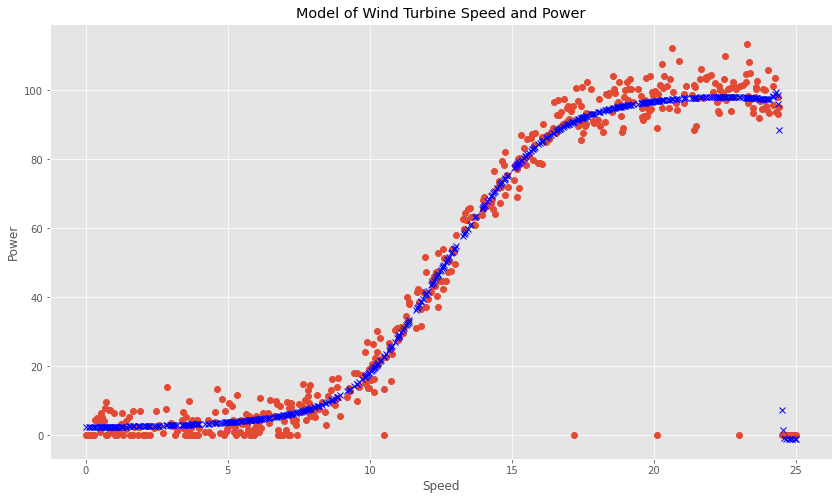

In [10]:
# Plot the values.
plt.plot(powerProductionData['speed'], powerProductionData['power'], 'o');
plt.plot(powerProductionData['speed'], model.predict(powerProductionData['speed']), 'bx');

#label the x axis 
plt.xlabel('Speed')
#label the y axis 
plt.ylabel('Power')
# Set the title
plt.title('Model of Wind Turbine Speed and Power')

***
Here we are saving the model into a h5 file that will be saved and loaded by the web service. The webservice will read in the data and print out a predicted value depending on the user input.

In [11]:
model.save('SavedModelData.h5')

***
The first graph shows the accuracy of the predictions, the lower the value,the better the predictions. The second graph shows the loss of the model while performing the fitting.

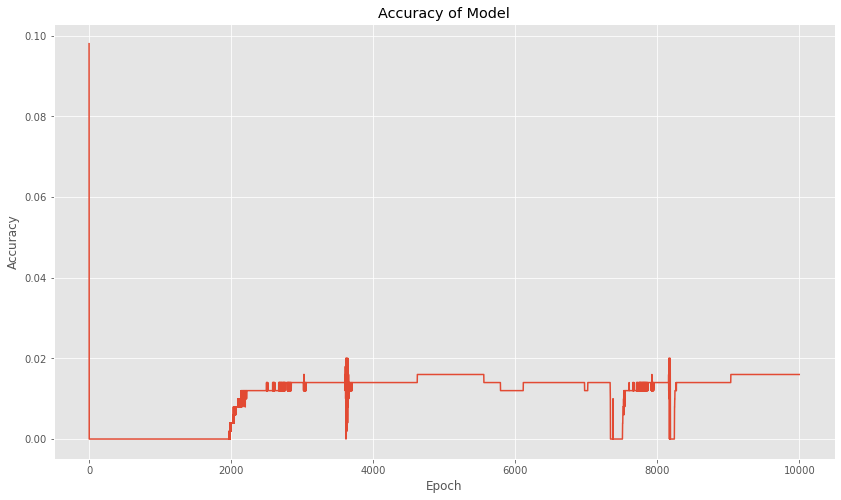

In [12]:
#label the x axis 
plt.xlabel('Epoch')
#label the y axis 
plt.ylabel('Accuracy')
# Set the title
plt.title('Accuracy of Model')

plt.plot(modelHistory.history['accuracy'])

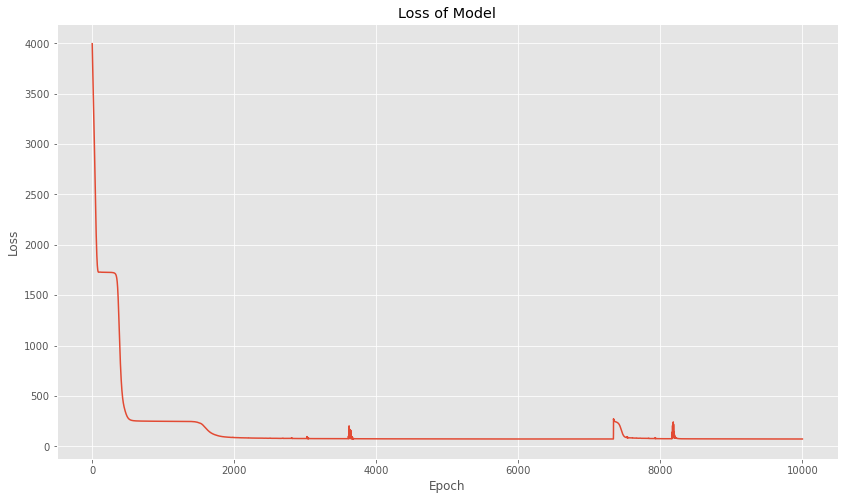

In [13]:
#label the x axis 
plt.xlabel('Epoch')
#label the y axis 
plt.ylabel('Loss')
# Set the title
plt.title('Loss of Model')

plt.plot(modelHistory.history['loss'])

# References

https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/<br>
https://machinelearningmastery.com/how-to-make-classification-and-regression-predictions-for-deep-learning-models-in-keras/<br>
https://www.geeksforgeeks.org/keras-fit-and-keras-fit_generator/<br>

***
## End